In [1]:
# import the required packages
import pandas as pd
import numpy as np
import re

# Visuals
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
import matplotlib.dates as mdates
from datetime import datetime

import nltk
from collections import Counter
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


C:\Users\fionn\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\fionn\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\fionn\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
mp01_23 = pd.read_csv('newData/MacPherson_Rack_01 -  23 December 2023.csv')
mp01_30 = pd.read_csv('newData/01 MacPherson_Rack (22 Dec 2023 to 18 Apr 2024) - 30 December 2023.csv')
mp01_05 = pd.read_csv('newData/MacPherson_Rack_01 - 5 April 2024.csv')
mp01_06 = pd.read_csv('newData/MacPherson_Rack_01 - 6 April 2024.csv')
mp01_10 = pd.read_csv("newData/01 MacPherson_Rack (22 Dec 2023 to 18 Apr 2024) - 10 April 2024.csv")
mp01_14 = pd.read_csv("newData/01 MacPherson_Rack (22 Dec 2023 to 18 Apr 2024) - 14 April 2024.csv")
mp01_15 = pd.read_csv("newData/01 MacPherson_Rack (22 Dec 2023 to 18 Apr 2024) - 15 April 2024.csv")
mp01_16 = pd.read_csv("newData/01 MacPherson_Rack (22 Dec 2023 to 18 Apr 2024) - 16 April 2024.csv")
mp01_17 = pd.read_csv("newData/01 MacPherson_Rack (22 Dec 2023 to 18 Apr 2024) - 17 April 2024.csv")
mp01_18 = pd.read_csv("newData/01 MacPherson_Rack (22 Dec 2023 to 18 Apr 2024) - 18 April 2024.csv")
mp02_01 = pd.read_csv("newData/02 MacPherson_Rack (01 May 2024 to 06 Jun 2024) - 1 May 2024.csv")
mp02_02 = pd.read_csv("newData/02 MacPherson_Rack (01 May 2024 to 06 Jun 2024) - 2 May 2024.csv")
mp02_03 = pd.read_csv("newData/02 MacPherson_Rack (01 May 2024 to 06 Jun 2024) - 3 May 2024.csv")
mp02_04 = pd.read_csv("newData/02 MacPherson_Rack (01 May 2024 to 06 Jun 2024) - 4 May 2024.csv")
emission = pd.read_csv("newData/MacPherson Feeding Logs - Emission Carbon Index.csv")
log1 = pd.read_csv("newData/MacPherson Feeding Logs - Sep to Dec 2023.csv")
log2 = pd.read_csv("newData/MacPherson Feeding Logs - Jan to Jun 2024.csv")

In [3]:
emission.columns = emission.iloc[0]
emission = emission[1:]
emission

,S/N,Food Name,Emissions (kg CO2/kg),Category,pH Value
1,1,Bread crusts,0.14,Brown,Neutral
2,2,Cauliflower leaves,0.07,Brown,Acidic
3,3,Cheese rinds,1.20,Brown,Acidic
4,4,Coffee grounds,0.20,Brown,Acidic
5,5,Ground coffee,0.23,Brown,Acidic
...,...,...,...,...,...
80,80,Okra,0.08,Green,Alkaline
81,81,Cardboard,0.20,Brown,Neutral
82,82,Chye Sim,0.13,Green,Neutral
83,83,Kai Lan,0.13,Green,Neutral


### 23rd December 2023 - Tank 1

In [4]:
mp01_23

,Timestamp,Number of Worms (non-counted),Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Light Intensity,Temp01,Hum01,Heat01,SoilM01,SoilM02,Grams of Compost Harvested,Buzzer (NIL)
0,"23 Dec 2023, 10:00 AM",20,160,150,120,150,100,94,NaN,28.5,0.0,42.0,1.0,1.0,NaN,NaN
1,"23 Dec 2023, 10:01 AM",20,160,150,120,150,100,94,NaN,28.5,0.0,42.0,1.0,1.0,NaN,NaN
2,"23 Dec 2023, 10:02 AM",20,160,150,120,150,100,94,NaN,28.5,0.0,42.0,1.0,1.0,NaN,NaN
3,"23 Dec 2023, 10:03 AM",20,160,150,120,150,100,94,NaN,28.5,0.0,42.0,1.0,1.0,NaN,NaN
4,"23 Dec 2023, 10:04 AM",20,160,150,120,150,100,94,NaN,28.5,96.0,42.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,"23 Dec 2023, 11:24 PM",20,?,?,?,?,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
805,"23 Dec 2023, 11:25 PM",20,?,?,?,?,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
806,"23 Dec 2023, 11:26 PM",20,?,?,?,?,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807,"23 Dec 2023, 11:27 PM",20,?,?,?,?,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
mp01_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      809 non-null    object 
 1   Number of Worms (non-counted)  809 non-null    int64  
 2   Phosphorous01                  809 non-null    object 
 3   Phosphorous02                  809 non-null    object 
 4   Nitrogen01                     809 non-null    object 
 5   Nitrogen02                     809 non-null    object 
 6   Potassium01                    809 non-null    object 
 7   Potassium02                    809 non-null    object 
 8   Light Intensity                0 non-null      float64
 9   Temp01                         632 non-null    float64
 10  Hum01                          632 non-null    float64
 11  Heat01                         632 non-null    float64
 12  SoilM01                        553 non-null    flo

In [6]:
mp01_23 = mp01_23.drop(columns=['Light Intensity', 'Grams of Compost Harvested' , 'Heat01', 'Buzzer (NIL)', 'Timestamp',
                                'Number of Worms (non-counted)'])

process = ['Phosphorous01', 'Phosphorous02', 'Nitrogen01', 'Nitrogen02', 'Potassium01' ,'Potassium02',
           'Temp01', 'Hum01', 'SoilM01', 'SoilM02']

for column in process:
    # Convert negative values to NaN
    mp01_23[column] = pd.to_numeric(mp01_23[column], errors='coerce')
    mp01_23.loc[mp01_23[column] <= 0, column] = np.nan
mp01_23 = mp01_23.dropna(subset=['Nitrogen01']) 


mp01_23["Hum01"] = mp01_23["Hum01"].fillna(method='bfill')
def interpolation(df):
    data = df.copy()
    for column in process:
        data[column] = data[column].interpolate(method='linear')
        
    return data
mp01_23 = interpolation(mp01_23)
mp01_23.describe()

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02
count,667.0,667.0,667.0,667.0,667.0,667.0,667.0,667.000000,667.0,667.0
mean,160.0,150.0,120.0,150.0,100.0,94.0,28.5,94.127436,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.031644,0.0,0.0
min,160.0,150.0,120.0,150.0,100.0,94.0,28.5,10.000000,1.0,1.0
25%,160.0,150.0,120.0,150.0,100.0,94.0,28.5,94.000000,1.0,1.0
50%,160.0,150.0,120.0,150.0,100.0,94.0,28.5,95.000000,1.0,1.0
75%,160.0,150.0,120.0,150.0,100.0,94.0,28.5,95.000000,1.0,1.0
max,160.0,150.0,120.0,150.0,100.0,94.0,28.5,100.000000,1.0,1.0


In [7]:
mp01_23 = mp01_23.describe().loc['mean'].to_frame().T
mp01_23

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02
mean,160.0,150.0,120.0,150.0,100.0,94.0,28.5,94.127436,1.0,1.0


In [8]:
mp01_23['FeedingLog'] = log1[log1['Date'] == "23 December 2023"]['Tank 1'].values[0]
mp01_23

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,FeedingLog
mean,160.0,150.0,120.0,150.0,100.0,94.0,28.5,94.127436,1.0,1.0,NaN


In [9]:
log1['Date'] = pd.to_datetime(log1['Date'], format='%d %B %Y')

target_date = pd.to_datetime("23 December 2023", format='%d %B %Y')

last_feed_date = target_date
while True:
    last_feed_date -= pd.Timedelta(days=1)
    if last_feed_date < log1['Date'].min():
        last_feed_date = None
        break
    if pd.notnull(log1[log1['Date'] == last_feed_date]['Tank 1']).any():
        break

if last_feed_date is not None:
    days_since_last_feed = (target_date - last_feed_date).days
    
else:
    days_since_last_feed = None

mp01_23['LastFed'] = days_since_last_feed
mp01_23

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,FeedingLog,LastFed
mean,160.0,150.0,120.0,150.0,100.0,94.0,28.5,94.127436,1.0,1.0,NaN,2


### 30th December

In [10]:
mp01_30

,Timestamp,Number of Worms (non-counted),Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Light Intensity,Temp01,Hum01,Heat01,SoilM01,SoilM02,Grams of Compost Harvested,Buzzer (NIL)
0,"30 Dec 2023, 10:00 AM",20,160,150,120,150,100,94,NaN,28.5,0.0,42.0,1.0,1.0,NaN,NaN
1,"30 Dec 2023, 10:01 AM",20,160,150,120,150,100,94,NaN,28.5,0.0,42.0,1.0,1.0,NaN,NaN
2,"30 Dec 2023, 10:02 AM",20,160,150,120,150,100,94,NaN,28.5,0.0,42.0,1.0,1.0,NaN,NaN
3,"30 Dec 2023, 10:03 AM",20,160,150,120,150,100,94,NaN,28.5,0.0,42.0,1.0,1.0,NaN,NaN
4,"30 Dec 2023, 10:04 AM",20,160,150,120,150,100,94,NaN,28.5,96.0,42.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,"30 Dec 2023, 11:15 PM",25,180,171,?,?,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796,"30 Dec 2023, 11:16 PM",25,180,171,?,?,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,"30 Dec 2023, 11:17 PM",25,180,171,?,?,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
798,"30 Dec 2023, 11:18 PM",25,180,171,?,?,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
mp01_30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      800 non-null    object 
 1   Number of Worms (non-counted)  800 non-null    object 
 2   Phosphorous01                  800 non-null    object 
 3   Phosphorous02                  800 non-null    int64  
 4   Nitrogen01                     800 non-null    object 
 5   Nitrogen02                     800 non-null    object 
 6   Potassium01                    800 non-null    object 
 7   Potassium02                    800 non-null    object 
 8   Light Intensity                0 non-null      float64
 9   Temp01                         632 non-null    float64
 10  Hum01                          632 non-null    float64
 11  Heat01                         632 non-null    float64
 12  SoilM01                        553 non-null    flo

In [12]:
mp01_30 = mp01_30.drop(columns=['Light Intensity', 'Grams of Compost Harvested' , 'Heat01', 'Buzzer (NIL)', 'Timestamp',
                                'Number of Worms (non-counted)'])

process = ['Phosphorous01', 'Phosphorous02', 'Nitrogen01', 'Nitrogen02', 'Potassium01' ,'Potassium02',
           'Temp01', 'Hum01', 'SoilM01', 'SoilM02']

for column in process:
    # Convert negative values to NaN
    mp01_30[column] = pd.to_numeric(mp01_30[column], errors='coerce')
    mp01_30.loc[mp01_30[column] <= 0, column] = np.nan
mp01_30 = mp01_30.dropna(subset=['Nitrogen01']) 



def interpolation(df):
    data = df.copy()
    for column in process:
        data[column] = data[column].interpolate(method='linear')
        
    return data
mp01_30 = interpolation(mp01_30)
mp01_30.describe()

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.0,667.0,663.000000,667.0,667.0
mean,165.209895,158.154423,120.209895,143.650675,100.152924,94.0,28.5,94.116139,1.0,1.0
std,5.198552,6.313993,0.613432,13.497614,0.660332,0.0,0.0,10.060846,0.0,0.0
min,160.000000,150.000000,120.000000,115.000000,100.000000,94.0,28.5,10.000000,1.0,1.0
25%,160.000000,150.000000,120.000000,150.000000,100.000000,94.0,28.5,94.000000,1.0,1.0
50%,164.000000,160.000000,120.000000,150.000000,100.000000,94.0,28.5,95.000000,1.0,1.0
75%,169.000000,164.000000,120.000000,150.000000,100.000000,94.0,28.5,95.000000,1.0,1.0
max,175.000000,167.000000,122.000000,150.000000,103.000000,94.0,28.5,100.000000,1.0,1.0


In [13]:
mp01_30 = mp01_30.describe().loc['mean'].to_frame().T
mp01_30

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02
mean,165.209895,158.154423,120.209895,143.650675,100.152924,94.0,28.5,94.116139,1.0,1.0


In [14]:
mp01_30['FeedingLog'] = log1[log1['Date'] == "30 December 2023"]['Tank 1'].values[0]
mp01_30

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,FeedingLog
mean,165.209895,158.154423,120.209895,143.650675,100.152924,94.0,28.5,94.116139,1.0,1.0,NaN


In [15]:
log1['Date'] = pd.to_datetime(log1['Date'], format='%d %B %Y')

target_date = pd.to_datetime("30 December 2023", format='%d %B %Y')

last_feed_date = target_date
while True:
    last_feed_date -= pd.Timedelta(days=1)
    if last_feed_date < log1['Date'].min():
        last_feed_date = None
        break
    if pd.notnull(log1[log1['Date'] == last_feed_date]['Tank 1']).any():
        break

if last_feed_date is not None:
    days_since_last_feed = (target_date - last_feed_date).days
else:
    days_since_last_feed = None

mp01_30['LastFed'] = days_since_last_feed
mp01_30

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,FeedingLog,LastFed
mean,165.209895,158.154423,120.209895,143.650675,100.152924,94.0,28.5,94.116139,1.0,1.0,NaN,1


### 5th April 2024 - Tank 1

In [16]:
mp01_05

,Timestamp,Number of Worms (non-counted),Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Light Intensity,Temp01,Hum01,Heat01,SoilM01,SoilM02,Grams of Compost Harvested,Buzzer
0,"5 Apr 2024, 10:00 AM",14,193,197,193,193,193,193,NaN,27.4,93.0,42.0,1.0,1.0,NaN,Off
1,"5 Apr 2024, 10:01 AM",14,189,159,172,145,156,145,NaN,27.4,93.0,42.0,1.0,1.0,NaN,Off
2,"5 Apr 2024, 10:02 AM",14,163,159,160,145,142,140,NaN,27.4,95.0,42.0,1.0,1.0,NaN,Off
3,"5 Apr 2024, 10:03 AM",14,196,152,162,143,193,173,NaN,27.4,97.0,42.0,1.0,1.0,NaN,Off
4,"5 Apr 2024, 10:04 AM",14,142,176,185,162,181,187,NaN,27.4,95.0,42.0,1.0,1.0,NaN,Off
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,"5 Apr 2024, 11:33 PM",?,?,?,?,?,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
814,"5 Apr 2024, 11:34 PM",?,?,?,?,?,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
815,"5 Apr 2024, 11:35 PM",?,?,?,?,?,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
816,"5 Apr 2024, 11:36 PM",?,?,?,?,?,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
mp01_05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      818 non-null    object 
 1   Number of Worms (non-counted)  818 non-null    object 
 2   Phosphorous01                  818 non-null    object 
 3   Phosphorous02                  818 non-null    object 
 4   Nitrogen01                     818 non-null    object 
 5   Nitrogen02                     818 non-null    object 
 6   Potassium01                    818 non-null    object 
 7   Potassium02                    818 non-null    object 
 8   Light Intensity                0 non-null      float64
 9   Temp01                         633 non-null    float64
 10  Hum01                          633 non-null    float64
 11  Heat01                         633 non-null    float64
 12  SoilM01                        667 non-null    flo

In [18]:
mp01_05 = mp01_05.drop(columns=['Light Intensity', 'Grams of Compost Harvested' , 'Heat01', 'Buzzer', 'Timestamp',
                                'Number of Worms (non-counted)'])

process = ['Phosphorous01', 'Phosphorous02', 'Nitrogen01', 'Nitrogen02', 'Potassium01' ,'Potassium02',
           'Temp01', 'Hum01', 'SoilM01', 'SoilM02']

for column in process:
    # Convert negative values to NaN
    mp01_05[column] = pd.to_numeric(mp01_05[column], errors='coerce')
    mp01_05.loc[mp01_05[column] <= 0, column] = np.nan
mp01_05 = mp01_05.dropna(subset=['Nitrogen01']) 

def interpolation(df):
    data = df.copy()
    for column in process:
        data[column] = data[column].interpolate(method='linear')
        
    return data
mp01_05 = interpolation(mp01_05)
mp01_05.describe()

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.0,667.0
mean,168.433283,170.254873,170.008996,169.286357,170.155922,171.107946,31.506597,95.683658,1.0,1.0
std,18.609540,17.953505,17.768107,18.072107,17.872160,17.940100,2.067157,3.187874,0.0,0.0
min,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,27.400000,84.000000,1.0,1.0
25%,151.000000,154.000000,155.000000,153.000000,155.000000,156.000000,31.700000,94.000000,1.0,1.0
50%,167.000000,171.000000,170.000000,168.000000,171.000000,172.000000,32.100000,96.000000,1.0,1.0
75%,185.000000,185.000000,185.000000,185.000000,185.000000,187.000000,32.800000,98.000000,1.0,1.0
max,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,34.600000,99.000000,1.0,1.0


In [19]:
mp01_05 = mp01_05.describe().loc['mean'].to_frame().T
mp01_05

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02
mean,168.433283,170.254873,170.008996,169.286357,170.155922,171.107946,31.506597,95.683658,1.0,1.0


In [20]:
mp01_05['FeedingLog'] = log2[log2['Date'] == "5 April 2024"]['Tank 1'].values[0]
mp01_05

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,FeedingLog
mean,168.433283,170.254873,170.008996,169.286357,170.155922,171.107946,31.506597,95.683658,1.0,1.0,NaN


In [21]:
log2['Date'] = pd.to_datetime(log2['Date'], format='%d %B %Y')

target_date = pd.to_datetime("5 April 2024", format='%d %B %Y')

last_feed_date = target_date
while True:
    last_feed_date -= pd.Timedelta(days=1)
    if last_feed_date < log2['Date'].min():
        last_feed_date = None
        break
    if pd.notnull(log2[log2['Date'] == last_feed_date]['Tank 1']).any():
        break

if last_feed_date is not None:
    days_since_last_feed = (target_date - last_feed_date).days
else:
    days_since_last_feed = None

mp01_05['LastFed'] = days_since_last_feed
mp01_05

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,FeedingLog,LastFed
mean,168.433283,170.254873,170.008996,169.286357,170.155922,171.107946,31.506597,95.683658,1.0,1.0,NaN,1


### 6th April

In [22]:
mp01_06

,Timestamp,Number of Worms (non-counted),Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Light Intensity,Temp01,Hum01,Heat01,SoilM01,SoilM02,Grams of Compost Harvested,Buzzer,Compost Notes
0,"6 Apr 2024, 10:00 AM",14.0,?,?,?,?,?,?,NaN,27.4,94.0,42.0,1.0,1.0,NaN,Off,NaN
1,"6 Apr 2024, 10:01 AM",14.0,?,?,?,?,?,?,NaN,27.4,97.0,42.0,1.0,1.0,NaN,Off,NaN
2,"6 Apr 2024, 10:02 AM",14.0,?,?,?,?,?,?,NaN,27.4,98.0,42.0,1.0,1.0,NaN,Off,NaN
3,"6 Apr 2024, 10:03 AM",14.0,?,?,?,?,?,?,NaN,27.4,96.0,42.0,1.0,1.0,NaN,Off,NaN
4,"6 Apr 2024, 10:04 AM",14.0,?,?,?,?,?,?,NaN,27.4,93.0,42.0,1.0,1.0,NaN,Off,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
mp01_06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      840 non-null    object 
 1   Number of Worms (non-counted)  588 non-null    float64
 2   Phosphorous01                  840 non-null    object 
 3   Phosphorous02                  840 non-null    object 
 4   Nitrogen01                     840 non-null    object 
 5   Nitrogen02                     840 non-null    object 
 6   Potassium01                    840 non-null    object 
 7   Potassium02                    840 non-null    object 
 8   Light Intensity                0 non-null      float64
 9   Temp01                         632 non-null    float64
 10  Hum01                          774 non-null    float64
 11  Heat01                         632 non-null    float64
 12  SoilM01                        502 non-null    flo

In [24]:
mp01_06 = mp01_06.drop(columns=['Light Intensity', 'Grams of Compost Harvested' , 'Heat01', 'Buzzer', 'Timestamp',
                                'Number of Worms (non-counted)'])

process = ['Phosphorous01', 'Phosphorous02', 'Nitrogen01', 'Nitrogen02', 'Potassium01' ,'Potassium02',
           'Temp01', 'Hum01', 'SoilM01', 'SoilM02']
NPK = ['Phosphorous01', 'Phosphorous02', 'Nitrogen01', 'Nitrogen02', 'Potassium01' ,'Potassium02']

for column in process:
    # Convert negative values to NaN
    mp01_06[column] = pd.to_numeric(mp01_06[column], errors='coerce')
    mp01_06.loc[mp01_06[column] <= 0, column] = 0

for column in NPK:
    mp01_06[column] = mp01_06[column].fillna(method='bfill')

mp01_06 = mp01_06.dropna(subset=['Nitrogen01']) 

for column in process:
    mp01_06.loc[mp01_06[column] == 0, column] = np.nan
    
def interpolation(df):
    data = df.copy()
    for column in process:
        data[column] = data[column].interpolate(method='linear')

    return data
mp01_06 = interpolation(mp01_06)
mp01_06.describe()

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.0,667.0
mean,157.833927,156.839252,156.462113,157.590919,156.375027,158.168880,31.452324,96.131934,1.0,1.0
std,21.278310,21.905474,21.331689,21.490947,21.407925,21.683089,2.045483,1.953817,0.0,0.0
min,1.329043,1.854920,1.329039,1.285714,1.285714,1.285714,27.400000,93.000000,1.0,1.0
25%,146.000000,144.375000,145.000000,146.000000,145.000000,146.000000,31.700000,94.000000,1.0,1.0
50%,157.000000,155.000000,156.000000,156.000000,154.000000,156.750000,32.000000,96.000000,1.0,1.0
75%,173.000000,174.000000,171.000000,174.000000,172.000000,175.000000,32.800000,98.000000,1.0,1.0
max,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,34.600000,99.000000,1.0,1.0


In [25]:
mp01_06 = mp01_06.describe().loc['mean'].to_frame().T
mp01_06

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02
mean,157.833927,156.839252,156.462113,157.590919,156.375027,158.16888,31.452324,96.131934,1.0,1.0


In [26]:
mp01_06['FeedingLog'] = log2[log2['Date'] == "6 April 2024"]['Tank 1'].values[0]
mp01_06

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,FeedingLog
mean,157.833927,156.839252,156.462113,157.590919,156.375027,158.16888,31.452324,96.131934,1.0,1.0,NaN


In [27]:
log2['Date'] = pd.to_datetime(log2['Date'], format='%d %B %Y')

target_date = pd.to_datetime("6 April 2024", format='%d %B %Y')

last_feed_date = target_date
while True:
    last_feed_date -= pd.Timedelta(days=1)
    if last_feed_date < log2['Date'].min():
        last_feed_date = None
        break
    if pd.notnull(log2[log2['Date'] == last_feed_date]['Tank 1']).any():
        break

if last_feed_date is not None:
    days_since_last_feed = (target_date - last_feed_date).days
else:
    days_since_last_feed = None

mp01_06['LastFed'] = days_since_last_feed
mp01_06

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,FeedingLog,LastFed
mean,157.833927,156.839252,156.462113,157.590919,156.375027,158.16888,31.452324,96.131934,1.0,1.0,NaN,2


### 10th April

In [28]:
mp01_10

,Timestamp,Number of Worms (non-counted),Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Light Intensity,Temp01,Hum01,Heat01,SoilM01,SoilM02,Grams of Compost Harvested,Buzzer,pH Rod 1,pH Rod 2
0,"10 Apr 2024, 10:00 AM",14.0,135.0,146.0,193.0,193.0,193.0,193.0,NaN,27.4,99.0,42.0,1.0,1.0,NaN,Off,187.72,188.35
1,"10 Apr 2024, 10:01 AM",14.0,133.0,131.0,172.0,145.0,156.0,145.0,NaN,27.4,93.0,42.0,1.0,1.0,NaN,Off,187.72,184.07
2,"10 Apr 2024, 10:02 AM",14.0,133.0,149.0,160.0,145.0,142.0,140.0,NaN,27.4,97.0,42.0,1.0,1.0,NaN,Off,183.96,185.05
3,"10 Apr 2024, 10:03 AM",14.0,178.0,185.0,162.0,143.0,193.0,173.0,NaN,27.4,98.0,42.0,1.0,1.0,NaN,Off,183.54,184.48
4,"10 Apr 2024, 10:04 AM",14.0,149.0,135.0,185.0,162.0,181.0,187.0,NaN,27.4,95.0,42.0,1.0,1.0,NaN,Off,189.22,189.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.55,189.29
512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.33,185.40
513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188.34,189.02
514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183.25,192.55


In [29]:
mp01_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      377 non-null    object 
 1   Number of Worms (non-counted)  377 non-null    float64
 2   Phosphorous01                  377 non-null    float64
 3   Phosphorous02                  377 non-null    float64
 4   Nitrogen01                     377 non-null    float64
 5   Nitrogen02                     377 non-null    float64
 6   Potassium01                    377 non-null    float64
 7   Potassium02                    377 non-null    float64
 8   Light Intensity                0 non-null      float64
 9   Temp01                         377 non-null    float64
 10  Hum01                          377 non-null    float64
 11  Heat01                         377 non-null    float64
 12  SoilM01                        291 non-null    flo

In [30]:
columns_to_convert = ['pH Rod 1', 'pH Rod 2']
mp01_10 = mp01_10.drop(columns=['Light Intensity', 'Grams of Compost Harvested' , 'Heat01', 'Buzzer',
                                'Number of Worms (non-counted)'])

# Convert columns to float
for col in columns_to_convert:
    # Convert non-positive values (such as "?" and negative numbers) with NaN
    mp01_10[col] = pd.to_numeric(mp01_10[col], errors='coerce')
# drop rows with no npk values
mp01_10 = mp01_10.dropna(subset=['Nitrogen01']) 

process = ['Phosphorous01', 'Phosphorous02', 'Nitrogen01', 'Nitrogen02', 'Potassium01' ,'Potassium02',
           'Temp01', 'Hum01', 'SoilM01', 'SoilM02', 'pH Rod 1', 'pH Rod 2']

for column in process:
    # Convert negative values to NaN
    mp01_10.loc[mp01_10[column] <= 0, column] = np.nan
    

def interpolation(df):
    data = df.copy()
    for column in process:
        data[column] = data[column].interpolate(method='linear')
        
    return data
mp01_10 = interpolation(mp01_10)
mp01_10.describe()

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2
count,377.000000,377.000000,377.000000,377.000000,377.00000,377.000000,377.000000,377.000000,377.0,377.0,377.000000,377.000000
mean,157.230769,159.393899,170.185676,170.122016,169.70557,170.366048,30.766048,95.901857,1.0,1.0,187.720305,187.871472
std,15.292966,17.508566,17.397191,18.261428,18.22162,17.775752,2.484219,2.006220,0.0,0.0,2.812994,2.864679
min,130.000000,130.000000,140.000000,140.000000,140.00000,140.000000,27.400000,93.000000,1.0,1.0,182.920000,182.950000
25%,146.000000,146.000000,158.000000,154.000000,153.00000,155.000000,27.400000,94.000000,1.0,1.0,185.310000,185.320000
50%,159.000000,155.000000,169.000000,169.000000,169.00000,170.000000,31.900000,96.000000,1.0,1.0,187.710000,188.180000
75%,168.000000,179.000000,185.000000,186.000000,185.00000,185.000000,32.100000,98.000000,1.0,1.0,190.010000,190.160000
max,199.000000,199.000000,201.000000,201.000000,201.00000,201.000000,34.600000,99.000000,1.0,1.0,192.830000,192.830000


In [31]:
Apr10 = mp01_10.copy()

In [32]:
mp01_10 = mp01_10.describe().loc['mean'].to_frame().T
mp01_10

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2
mean,157.230769,159.393899,170.185676,170.122016,169.70557,170.366048,30.766048,95.901857,1.0,1.0,187.720305,187.871472


In [33]:
mp01_10['FeedingLog'] = log2[log2['Date'] == "10 April 2024"]['Tank 1'].values[0]
mp01_10

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2,FeedingLog
mean,157.230769,159.393899,170.185676,170.122016,169.70557,170.366048,30.766048,95.901857,1.0,1.0,187.720305,187.871472,"15g coffee grounds, 100g of distilled water, 3..."


In [34]:
log2['Date'] = pd.to_datetime(log2['Date'], format='%d %B %Y')

target_date = pd.to_datetime("10 April 2024", format='%d %B %Y')

last_feed_date = target_date
while True:
    last_feed_date -= pd.Timedelta(days=1)
    if last_feed_date < log2['Date'].min():
        last_feed_date = None
        break
    if pd.notnull(log2[log2['Date'] == last_feed_date]['Tank 1']).any():
        break

if last_feed_date is not None:
    days_since_last_feed = (target_date - last_feed_date).days
else:
    days_since_last_feed = None

mp01_10['LastFed'] = days_since_last_feed
mp01_10

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2,FeedingLog,LastFed
mean,157.230769,159.393899,170.185676,170.122016,169.70557,170.366048,30.766048,95.901857,1.0,1.0,187.720305,187.871472,"15g coffee grounds, 100g of distilled water, 3...",2


### 14th April

In [35]:
mp01_14.drop(0, inplace=True) # Row of units and measurements
mp01_14.reset_index(drop=True, inplace=True)
mp01_14

,Timestamp,Number of Worms (non-counted),Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Light Intensity,Temp01,Hum01,Heat01,SoilM01,SoilM02,Grams of Compost Harvested,Buzzer,pH Rod 1,pH Rod 2
0,"14 Apr 2024, 10:00 AM",NaN,146,169,131,156,169,160,NaN,28.5,0,42,1,1,NaN,Off,187.72,183.8
1,"14 Apr 2024, 10:01 AM",NaN,146,149,131,159,183,184,NaN,27.4,0,42,1,1,NaN,Off,186.7,190.95
2,"14 Apr 2024, 10:02 AM",NaN,146,147,131,159,136,175,NaN,27.4,0,42,1,1,NaN,Off,190.55,192.65
3,"14 Apr 2024, 10:03 AM",NaN,146,130,132,157,145,165,NaN,27.4,0,42,1,1,NaN,Off,192.13,185.87
4,"14 Apr 2024, 10:04 AM",NaN,146,153,132,157,133,138,NaN,29.1,0,42,1,1,NaN,Off,183.36,183.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,"14 Apr 2024, 3:24 PM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.3,95,43,NaN,NaN,NaN,Off,189.02,190.56
325,"14 Apr 2024, 3:25 PM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.3,95,43,NaN,NaN,NaN,Off,184.92,187.26
326,"14 Apr 2024, 3:26 PM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.3,95,43,NaN,NaN,NaN,Off,186.10,188.07
327,"14 Apr 2024, 3:27 PM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.3,95,43,NaN,NaN,NaN,Off,192.64,189.00


In [36]:
mp01_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Timestamp                      329 non-null    object
 1   Number of Worms (non-counted)  0 non-null      object
 2   Phosphorous01                  310 non-null    object
 3   Phosphorous02                  310 non-null    object
 4   Nitrogen01                     310 non-null    object
 5   Nitrogen02                     310 non-null    object
 6   Potassium01                    310 non-null    object
 7   Potassium02                    310 non-null    object
 8   Light Intensity                0 non-null      object
 9   Temp01                         329 non-null    object
 10  Hum01                          329 non-null    object
 11  Heat01                         329 non-null    object
 12  SoilM01                        281 non-null    object
 13  SoilM

In [37]:
mp01_14 = mp01_14.drop(columns=['Light Intensity', 'Grams of Compost Harvested' , 'Heat01', 'Buzzer', 
                                'Number of Worms (non-counted)'])

process = ['Phosphorous01', 'Phosphorous02', 'Nitrogen01', 'Nitrogen02', 'Potassium01' ,'Potassium02',
           'Temp01', 'Hum01', 'SoilM01', 'SoilM02', 'pH Rod 1', 'pH Rod 2']
for col in process:
    # Convert non-positive values (such as "?" and negative numbers) with NaN
    mp01_14[col] = pd.to_numeric(mp01_14[col], errors='coerce')

# Define the time period of sensor malfunction
mp01_14['Timestamp'] = pd.to_datetime(mp01_14['Timestamp'], format='%d %b %Y, %I:%M %p')
mp01_14['Time'] = mp01_14['Timestamp'].dt.time
mp01_14['Day'] = mp01_14['Timestamp'].dt.day
start_time = pd.to_datetime('13:33:00').time()
end_time = pd.to_datetime('13:38:00').time()

# Flag the data points where day 14th and time is between 13:33:00 and 13:38:00
sensor_malfunction = (mp01_14['Day'] == 14) & (mp01_14['Time'].apply(lambda x: x >= start_time) & (mp01_14['Time'].apply(lambda x: x <= end_time)))

NPK_columns = ['Phosphorous01', 'Phosphorous02', 'Potassium01' ,'Potassium02']
for column in NPK_columns:
    # Convert negative values to NaN
    mp01_14.loc[mp01_14[column] <= 0, column] = np.nan
    mp01_14.loc[sensor_malfunction, column] = np.nan
    
mp01_14["Hum01"] = mp01_14["Hum01"].fillna(method='bfill')
def interpolation(df):
    data = df.copy()
    for column in process:
        data[column] = data[column].interpolate(method='linear')
        
    return data
mp01_14 = interpolation(mp01_14)
mp01_14.describe()

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2,Day
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.0
mean,157.404255,157.895137,161.176292,162.762918,156.957447,156.012158,32.284195,87.537994,0.869301,0.854103,188.152584,188.112158,14.0
std,17.269297,18.127014,17.612165,5.457571,15.444373,16.961304,2.386878,25.867143,0.337584,0.353540,2.866386,2.742578,0.0
min,130.000000,130.000000,131.000000,148.000000,130.000000,130.000000,27.400000,0.000000,0.000000,0.000000,182.950000,182.920000,14.0
25%,146.000000,146.000000,146.000000,159.000000,146.000000,146.000000,31.700000,95.000000,1.000000,1.000000,185.930000,185.980000,14.0
50%,150.000000,150.000000,169.000000,160.000000,153.000000,149.000000,32.100000,95.000000,1.000000,1.000000,188.460000,187.920000,14.0
75%,172.000000,176.000000,177.000000,164.000000,167.000000,171.000000,33.300000,95.000000,1.000000,1.000000,190.580000,190.530000,14.0
max,199.000000,199.000000,190.000000,175.000000,199.000000,199.000000,36.100000,100.000000,1.000000,1.000000,192.820000,192.810000,14.0


In [38]:
mp01_14 = mp01_14.drop(columns=["Day", "Time"])
mp01_14['Timestamp'] = pd.to_datetime(mp01_14['Timestamp'], format='%d/%m/%Y %I:%M:%S %p', errors='coerce')
mp01_14['Timestamp'] = mp01_14['Timestamp'].dt.strftime('%d %b %Y, %I:%M %p')

In [39]:
Apr14 = mp01_14.copy()

In [40]:
Apr14

,Timestamp,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2
0,"14 Apr 2024, 10:00 AM",146.0,169.0,131.0,156.0,169.0,160.0,28.5,0,1.0,1.0,187.72,183.80
1,"14 Apr 2024, 10:01 AM",146.0,149.0,131.0,159.0,183.0,184.0,27.4,0,1.0,1.0,186.70,190.95
2,"14 Apr 2024, 10:02 AM",146.0,147.0,131.0,159.0,136.0,175.0,27.4,0,1.0,1.0,190.55,192.65
3,"14 Apr 2024, 10:03 AM",146.0,130.0,132.0,157.0,145.0,165.0,27.4,0,1.0,1.0,192.13,185.87
4,"14 Apr 2024, 10:04 AM",146.0,153.0,132.0,157.0,133.0,138.0,29.1,0,1.0,1.0,183.36,183.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,"14 Apr 2024, 03:24 PM",136.0,186.0,180.0,174.0,153.0,137.0,33.3,95,1.0,1.0,189.02,190.56
325,"14 Apr 2024, 03:25 PM",136.0,186.0,180.0,174.0,153.0,137.0,33.3,95,1.0,1.0,184.92,187.26
326,"14 Apr 2024, 03:26 PM",136.0,186.0,180.0,174.0,153.0,137.0,33.3,95,1.0,1.0,186.10,188.07
327,"14 Apr 2024, 03:27 PM",136.0,186.0,180.0,174.0,153.0,137.0,33.3,95,1.0,1.0,192.64,189.00


In [41]:
mp01_14 = mp01_14.describe().loc['mean'].to_frame().T
mp01_14

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2
mean,157.404255,157.895137,161.176292,162.762918,156.957447,156.012158,32.284195,87.537994,0.869301,0.854103,188.152584,188.112158


In [42]:
mp01_14['FeedingLog'] = log2[log2['Date'] == "14 April 2024"]['Tank 1'].values[0]
mp01_14

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2,FeedingLog
mean,157.404255,157.895137,161.176292,162.762918,156.957447,156.012158,32.284195,87.537994,0.869301,0.854103,188.152584,188.112158,NaN


In [43]:
log2['Date'] = pd.to_datetime(log2['Date'], format='%d %B %Y')

target_date = pd.to_datetime("14 April 2024", format='%d %B %Y')

last_feed_date = target_date
while True:
    last_feed_date -= pd.Timedelta(days=1)
    if last_feed_date < log2['Date'].min():
        last_feed_date = None
        break
    if pd.notnull(log2[log2['Date'] == last_feed_date]['Tank 1']).any():
        break

if last_feed_date is not None:
    days_since_last_feed = (target_date - last_feed_date).days
else:
    days_since_last_feed = None

mp01_14['LastFed'] = days_since_last_feed
mp01_14

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2,FeedingLog,LastFed
mean,157.404255,157.895137,161.176292,162.762918,156.957447,156.012158,32.284195,87.537994,0.869301,0.854103,188.152584,188.112158,NaN,1


### 15th April

In [44]:
mp01_15.drop(0, inplace=True) # Row of units and measurements
mp01_15.reset_index(drop=True, inplace=True)
mp01_15

,Timestamp,Number of Worms (non-counted),Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Light Intensity,Temp01,Hum01,Heat01,SoilM01,SoilM02,pH Rod 1,pH Rod 2,Grams of Compost Harvested
0,"15 Apr 2024, 10:00 AM",30,54,56,142,142,132,122,29,32.7,80,95,1,1,121.85,-126.85,NaN
1,"15 Apr 2024, 10:10 AM",30,54,56,142,142,110,120,29,32.7,81,95,1,1,117.67,-124.67,NaN
2,"15 Apr 2024, 10:20 AM",30,54,56,140,140,132,123,29,32.7,81,93,1,1,117.29,-118.29,NaN
3,"15 Apr 2024, 10:30 AM",30,54,56,140,140,129,123,29,32.7,80,90,1,1,115.58,-116.58,NaN
4,"15 Apr 2024, 10:40 AM",30,54,56,140,140,131,123,29,32.7,79,95,1,1,120.51,-127.51,NaN
5,"15 Apr 2024, 10:50 AM",30,54,56,140,140,131,123,29,32.7,78,94,1,1,121.42,-127.42,NaN
6,"15 Apr 2024, 11:00 AM",30,0,0,0,0,0,0,29,33.8,79,93,1,1,116.24,-117.24,NaN
7,"15 Apr 2024, 11:10 AM",30,0,0,0,0,0,0,29,35.3,77,90,1,1,196.41,-200.41,60g harvested here
8,"15 Apr 2024, 11:20 AM",30,0,0,0,0,0,0,29,35.0,76,90,1,1,197.43,-202.43,NaN
9,"15 Apr 2024, 11:30 AM",30,0,0,0,0,0,0,29,34.9,78,93,1,1,196.71,-199.71,NaN


In [45]:
mp01_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Timestamp                      55 non-null     object
 1   Number of Worms (non-counted)  55 non-null     object
 2   Phosphorous01                  55 non-null     object
 3   Phosphorous02                  55 non-null     object
 4   Nitrogen01                     55 non-null     object
 5   Nitrogen02                     55 non-null     object
 6   Potassium01                    55 non-null     object
 7   Potassium02                    55 non-null     object
 8   Light Intensity                55 non-null     object
 9   Temp01                         55 non-null     object
 10  Hum01                          55 non-null     object
 11  Heat01                         55 non-null     object
 12  SoilM01                        55 non-null     object
 13  SoilM02

In [46]:
mp01_15 = mp01_15.drop(columns=['Light Intensity', 'Grams of Compost Harvested' , 'Heat01', 
                                'Number of Worms (non-counted)'])

process = ['Phosphorous01', 'Phosphorous02', 'Nitrogen01', 'Nitrogen02', 'Potassium01' ,'Potassium02',
           'Temp01', 'Hum01', 'SoilM01', 'SoilM02', 'pH Rod 1', 'pH Rod 2']

# Convert columns to float
for col in process:
    # Convert non-positive values (such as "?" and negative numbers) with NaN
    mp01_15[col] = pd.to_numeric(mp01_15[col], errors='coerce')
    mp01_15.loc[mp01_15[col] == 0, col] = np.nan
    
# Assuming 'wrong_column' is the column with wrongly recorded negative values
mp01_15['pH Rod 2'] = mp01_15['pH Rod 2'] * -1

# drop rows with no npk values
mp01_15 = mp01_15.dropna(subset=['Nitrogen01']) 

mp01_15.describe()

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0,49.0,49.000000,49.000000
mean,56.285714,58.183673,89.265306,61.979592,78.489796,77.653061,30.804082,78.897959,1.0,1.0,182.283469,186.385510
std,1.224745,1.317723,19.422684,29.699530,18.720669,16.887558,2.518594,3.731872,0.0,0.0,24.513037,24.530553
min,54.000000,56.000000,81.000000,51.000000,69.000000,69.000000,28.500000,74.000000,1.0,1.0,115.580000,116.580000
25%,56.000000,57.000000,81.000000,51.000000,72.000000,71.000000,28.500000,76.000000,1.0,1.0,185.920000,189.390000
50%,56.000000,59.000000,83.000000,51.000000,72.000000,72.000000,28.500000,78.000000,1.0,1.0,187.820000,192.420000
75%,58.000000,59.000000,83.000000,51.000000,72.000000,72.000000,33.500000,81.000000,1.0,1.0,193.280000,197.520000
max,58.000000,59.000000,142.000000,142.000000,132.000000,123.000000,35.300000,93.000000,1.0,1.0,204.110000,211.100000


In [47]:
Apr15 = mp01_15.copy()

In [48]:
mp01_15 = mp01_15.describe().loc['mean'].to_frame().T
mp01_15

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2
mean,56.285714,58.183673,89.265306,61.979592,78.489796,77.653061,30.804082,78.897959,1.0,1.0,182.283469,186.38551


In [49]:
mp01_15['FeedingLog'] = log2[log2['Date'] == "15 April 2024"]['Tank 1'].values[0]
mp01_15

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2,FeedingLog
mean,56.285714,58.183673,89.265306,61.979592,78.489796,77.653061,30.804082,78.897959,1.0,1.0,182.283469,186.38551,NaN


In [50]:
log2['Date'] = pd.to_datetime(log2['Date'], format='%d %B %Y')

target_date = pd.to_datetime("15 April 2024", format='%d %B %Y')

last_feed_date = target_date
while True:
    last_feed_date -= pd.Timedelta(days=1)
    if last_feed_date < log2['Date'].min():
        last_feed_date = None
        break
    if pd.notnull(log2[log2['Date'] == last_feed_date]['Tank 1']).any():
        break

if last_feed_date is not None:
    days_since_last_feed = (target_date - last_feed_date).days
else:
    days_since_last_feed = None

mp01_15['LastFed'] = days_since_last_feed
mp01_15

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2,FeedingLog,LastFed
mean,56.285714,58.183673,89.265306,61.979592,78.489796,77.653061,30.804082,78.897959,1.0,1.0,182.283469,186.38551,NaN,2


### 16th April

In [51]:
mp01_16.drop(0, inplace=True) # Row of units and measurements
mp01_16.reset_index(drop=True, inplace=True)
mp01_16

,Timestamp,Number of Worms (non-counted),Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Light Intensity,Temp01,Hum01,Heat01,SoilM01,SoilM02,Buzzer,pH Rod 1,pH Rod 2,Grams of Compost Harvested
0,"16 Apr 2024, 10:00 AM",28 (2 escape),56,59,81,51,72,72,29,28.1,90,93,1,1,0.00,189.01,200.12,NaN
1,"16 Apr 2024, 10:10 AM",28,56,59,81,51,72,74,29,28.1,88,92,1,1,0.00,203.22,200.84,NaN
2,"16 Apr 2024, 10:20 AM",28,56,59,81,51,72,72,29,28.2,83,93,1,1,0.00,198.01,200.73,NaN
3,"16 Apr 2024, 10:30 AM",28,56,59,81,51,72,72,29,28.2,87,91,1,1,0.00,208.12,200.92,NaN
4,"16 Apr 2024, 10:40 AM",28,56,59,81,51,72,73,29,28.3,84,91,1,1,0.00,204.37,200.34,NaN
5,"16 Apr 2024, 10:50 AM",28,56,59,81,51,72,72,29,28.3,88,92,1,1,0.00,190.00,200.49,NaN
6,"16 Apr 2024, 11:00 AM",28,56,59,81,51,72,72,29,28.4,86,90,1,1,0.00,187.09,200.64,NaN
7,"16 Apr 2024, 11:10 AM",28,58,63,83,53,72,73,29,28.4,82,93,1,1,0.00,190.38,200.79,NaN
8,"16 Apr 2024, 11:20 AM",28,58,63,83,53,72,73,29,28.5,84,92,1,1,0.00,180.62,200.63,NaN
9,"16 Apr 2024, 11:30 AM",28,58,63,83,53,72,73,29,28.5,88,93,1,1,0.00,195.09,200.78,NaN


In [52]:
mp01_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Timestamp                      54 non-null     object
 1   Number of Worms (non-counted)  54 non-null     object
 2   Phosphorous01                  54 non-null     object
 3   Phosphorous02                  54 non-null     object
 4   Nitrogen01                     54 non-null     object
 5   Nitrogen02                     54 non-null     object
 6   Potassium01                    54 non-null     object
 7   Potassium02                    54 non-null     object
 8   Light Intensity                54 non-null     object
 9   Temp01                         54 non-null     object
 10  Hum01                          54 non-null     object
 11  Heat01                         54 non-null     object
 12  SoilM01                        54 non-null     object
 13  SoilM02

In [53]:
mp01_16 = mp01_16.drop(columns=['Light Intensity', 'Grams of Compost Harvested' , 'Heat01', 'Buzzer', 
                                'Number of Worms (non-counted)'])

process = ['Phosphorous01', 'Phosphorous02', 'Nitrogen01', 'Nitrogen02', 'Potassium01' ,'Potassium02',
           'Temp01', 'Hum01', 'SoilM01', 'SoilM02', 'pH Rod 1', 'pH Rod 2']
for col in process:
    # Convert non-positive values (such as "?" and negative numbers) with NaN
    mp01_16[col] = pd.to_numeric(mp01_16[col], errors='coerce')

mp01_16.describe()

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2
count,54.000000,54.000000,54.000000,54.000000,54.0,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,57.611111,62.481481,82.740741,53.388889,72.0,75.425926,29.887037,79.388889,0.925926,0.925926,195.107222,200.529630
std,1.250157,1.424062,0.678099,1.618486,0.0,1.838804,1.453694,5.377861,0.264351,0.264351,9.369928,0.282348
min,56.000000,59.000000,81.000000,51.000000,72.0,72.000000,28.100000,70.000000,0.000000,0.000000,180.340000,200.000000
25%,56.000000,63.000000,83.000000,53.000000,72.0,74.250000,28.425000,75.000000,1.000000,1.000000,186.382500,200.255000
50%,58.000000,63.000000,83.000000,53.000000,72.0,76.000000,30.050000,79.000000,1.000000,1.000000,195.685000,200.580000
75%,58.000000,63.000000,83.000000,53.000000,72.0,77.000000,31.300000,83.000000,1.000000,1.000000,202.955000,200.737500
max,60.000000,65.000000,83.000000,57.000000,72.0,78.000000,32.000000,90.000000,1.000000,1.000000,209.670000,200.960000


In [54]:
Apr16 = mp01_16

In [55]:
mp01_16 = mp01_16.describe().loc['mean'].to_frame().T
mp01_16

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2
mean,57.611111,62.481481,82.740741,53.388889,72.0,75.425926,29.887037,79.388889,0.925926,0.925926,195.107222,200.52963


In [56]:
mp01_16['FeedingLog'] = log2[log2['Date'] == "16 April 2024"]['Tank 1'].values[0]
mp01_16

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2,FeedingLog
mean,57.611111,62.481481,82.740741,53.388889,72.0,75.425926,29.887037,79.388889,0.925926,0.925926,195.107222,200.52963,NaN


In [57]:
log2['Date'] = pd.to_datetime(log2['Date'], format='%d %B %Y')

target_date = pd.to_datetime("16 April 2024", format='%d %B %Y')

last_feed_date = target_date
while True:
    last_feed_date -= pd.Timedelta(days=1)
    if last_feed_date < log2['Date'].min():
        last_feed_date = None
        break
    if pd.notnull(log2[log2['Date'] == last_feed_date]['Tank 1']).any():
        break

if last_feed_date is not None:
    days_since_last_feed = (target_date - last_feed_date).days
else:
    days_since_last_feed = None

mp01_16['LastFed'] = days_since_last_feed
mp01_16

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2,FeedingLog,LastFed
mean,57.611111,62.481481,82.740741,53.388889,72.0,75.425926,29.887037,79.388889,0.925926,0.925926,195.107222,200.52963,NaN,3


### 17th April

In [58]:
mp01_17.drop(0, inplace=True) # Row of units and measurements
mp01_17.reset_index(drop=True, inplace=True)
mp01_17

,Timestamp,Number of Worms (non-counted),Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Light Intensity,Temp01,Hum01,Heat01,SoilM01,SoilM02,Buzzer,pH Rod 1,pH Rod 2,Grams of Compost Harvested
0,"17 Apr 2024, 10:00 AM",25,133,149,170,157,140,152,42,27.4,98,42,1,1,NaN,190.28,190.73,NaN
1,"17 Apr 2024, 10:10 AM",25,178,185,170,157,140,152,41,27.4,98,42,1,1,NaN,183.17,189.52,NaN
2,"17 Apr 2024, 10:20 AM",25,149,135,170,158,143,152,42,27.4,98,42,1,1,NaN,188.62,189.19,NaN
3,"17 Apr 2024, 10:30 AM",25,135,163,170,157,140,152,42,27.4,98,42,1,1,NaN,185.14,192.14,NaN
4,"17 Apr 2024, 10:40 AM",25,154,173,170,157,140,152,40,27.5,98,45,1,1,NaN,185.02,186.33,NaN
5,"17 Apr 2024, 10:50 AM",25,190,162,170,157,140,152,42,27.9,98,42,1,1,NaN,192.53,185.03,NaN
6,"17 Apr 2024, 11:00 AM",25,145,169,170,157,140,152,40,27.4,98,42,1,1,NaN,186.11,187.31,NaN
7,"17 Apr 2024, 11:10 AM",25,174,134,170,154,140,152,41,27.8,98,42,1,1,NaN,184.62,184.90,NaN
8,"17 Apr 2024, 11:20 AM",25,131,185,170,157,140,153,42,27.6,98,42,1,1,NaN,191.25,191.41,NaN
9,"17 Apr 2024, 11:30 AM",25,135,144,170,158,140,152,42,27.5,98,41,1,1,NaN,186.57,188.81,NaN


In [59]:
mp01_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Timestamp                      54 non-null     object
 1   Number of Worms (non-counted)  54 non-null     object
 2   Phosphorous01                  54 non-null     object
 3   Phosphorous02                  54 non-null     object
 4   Nitrogen01                     54 non-null     object
 5   Nitrogen02                     54 non-null     object
 6   Potassium01                    54 non-null     object
 7   Potassium02                    54 non-null     object
 8   Light Intensity                54 non-null     object
 9   Temp01                         54 non-null     object
 10  Hum01                          54 non-null     object
 11  Heat01                         54 non-null     object
 12  SoilM01                        54 non-null     object
 13  SoilM02

In [60]:
mp01_17 = mp01_17.drop(columns=['Light Intensity', 'Grams of Compost Harvested' , 'Heat01', 'Buzzer', 
                                'Number of Worms (non-counted)'])

process = ['Phosphorous01', 'Phosphorous02', 'Nitrogen01', 'Nitrogen02', 'Potassium01' ,'Potassium02',
           'Temp01', 'Hum01', 'SoilM01', 'SoilM02', 'pH Rod 1', 'pH Rod 2']
for col in process:
    # Convert non-positive values (such as "?" and negative numbers) with NaN
    mp01_17[col] = pd.to_numeric(mp01_17[col], errors='coerce')

mp01_17.describe()


,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0,54.0,54.0,54.000000,54.000000
mean,162.444444,158.685185,170.444444,158.592593,142.722222,152.333333,27.631481,98.0,1.0,1.0,187.853704,187.191852
std,10.967648,10.618290,0.904218,3.230273,4.736118,0.700404,0.225559,0.0,0.0,0.0,2.825347,3.130243
min,131.000000,131.000000,170.000000,154.000000,140.000000,152.000000,27.400000,98.0,1.0,1.0,183.150000,182.920000
25%,160.250000,153.000000,170.000000,157.000000,140.000000,152.000000,27.400000,98.0,1.0,1.0,185.317500,184.502500
50%,165.000000,160.000000,170.000000,157.000000,140.000000,152.000000,27.600000,98.0,1.0,1.0,188.195000,186.660000
75%,168.000000,165.000000,170.000000,158.000000,143.000000,152.000000,27.800000,98.0,1.0,1.0,190.302500,189.775000
max,190.000000,185.000000,173.000000,165.000000,158.000000,154.000000,28.000000,98.0,1.0,1.0,192.610000,192.730000


In [61]:
Apr17 = mp01_17

In [62]:
mp01_17 = mp01_17.describe().loc['mean'].to_frame().T
mp01_17

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2
mean,162.444444,158.685185,170.444444,158.592593,142.722222,152.333333,27.631481,98.0,1.0,1.0,187.853704,187.191852


In [63]:
mp01_17['FeedingLog'] = log2[log2['Date'] == "17 April 2024"]['Tank 1'].values[0]
mp01_17

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2,FeedingLog
mean,162.444444,158.685185,170.444444,158.592593,142.722222,152.333333,27.631481,98.0,1.0,1.0,187.853704,187.191852,"15g coffee grounds, 100g of distilled water, 3..."


In [64]:
log2['Date'] = pd.to_datetime(log2['Date'], format='%d %B %Y')

target_date = pd.to_datetime("17 April 2024", format='%d %B %Y')

last_feed_date = target_date
while True:
    last_feed_date -= pd.Timedelta(days=1)
    if last_feed_date < log2['Date'].min():
        last_feed_date = None
        break
    if pd.notnull(log2[log2['Date'] == last_feed_date]['Tank 1']).any():
        break

if last_feed_date is not None:
    days_since_last_feed = (target_date - last_feed_date).days
else:
    days_since_last_feed = None

mp01_17['LastFed'] = days_since_last_feed
mp01_17

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2,FeedingLog,LastFed
mean,162.444444,158.685185,170.444444,158.592593,142.722222,152.333333,27.631481,98.0,1.0,1.0,187.853704,187.191852,"15g coffee grounds, 100g of distilled water, 3...",4


### 18th April

In [65]:
mp01_18.drop(0, inplace=True) # Row of units and measurements
mp01_18.reset_index(drop=True, inplace=True)
mp01_18

,Timestamp,Number of Worms (non-counted),Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Light Intensity,Temp01,Hum01,Heat01,SoilM01,SoilM02,Buzzer,pH Rod 1,pH Rod 2,Grams of Compost Harvested
0,"18 Apr 2024, 10:10 AM",25,1,168,170,164,153,152,51,27.5,83,42,1,1,NaN,187.72,191.62,NaN
1,"18 Apr 2024, 10:20 AM",25,161,163,170,164,158,152,53,27.4,83,42,1,1,NaN,184.66,189.90,NaN
2,"18 Apr 2024, 10:30 AM",25,170,168,170,164,153,152,51,27.5,84,42,1,1,NaN,191.45,187.43,NaN
3,"18 Apr 2024, 10:40 AM",25,0,0,0,0,0,0,0,0,0,0,0,0,NaN,185.08,185.17,NaN
4,"18 Apr 2024, 10:50 AM",25,0,0,0,0,0,0,0,0,0,0,0,0,NaN,186.40,191.34,203g of compost harvested
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,"18 Apr 2024, 9:10 PM",25,43,47,51,52,14,30,41,28.2,56,40,1,1,NaN,185.22,189.38,NaN
67,"18 Apr 2024, 9:20 PM",25,45,47,51,52,14,29,44,28.6,56,39,1,1,NaN,190.45,189.25,NaN
68,"18 Apr 2024, 9:30 PM",25,44,44,51,52,14,30,42,28.3,56,40,1,1,NaN,188.63,186.49,NaN
69,"18 Apr 2024, 9:40 PM",25,45,46,51,52,14,25,41,29.0,56,39,1,1,NaN,187.34,183.10,NaN


In [66]:
mp01_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Timestamp                      71 non-null     object
 1   Number of Worms (non-counted)  71 non-null     object
 2   Phosphorous01                  71 non-null     object
 3   Phosphorous02                  71 non-null     object
 4   Nitrogen01                     71 non-null     object
 5   Nitrogen02                     71 non-null     object
 6   Potassium01                    71 non-null     object
 7   Potassium02                    71 non-null     object
 8   Light Intensity                71 non-null     object
 9   Temp01                         71 non-null     object
 10  Hum01                          71 non-null     object
 11  Heat01                         71 non-null     object
 12  SoilM01                        71 non-null     object
 13  SoilM02

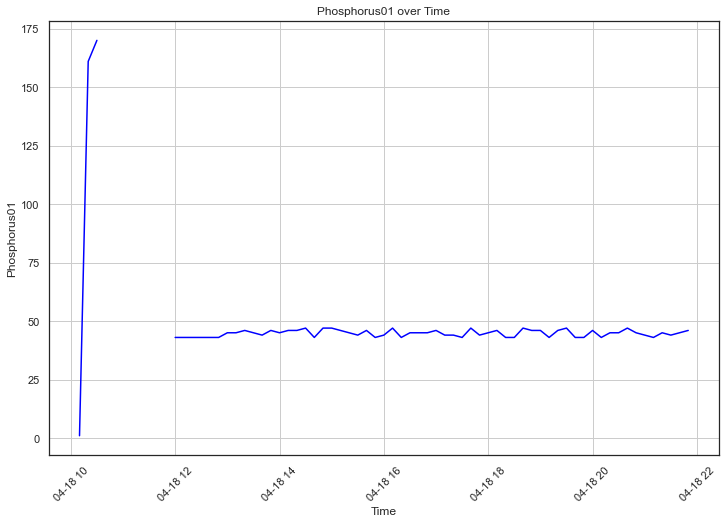

In [67]:
mp01_18 = mp01_18.drop(columns=['Light Intensity', 'Grams of Compost Harvested' , 'Heat01', 'Buzzer',
                                'Number of Worms (non-counted)'])
mp01_18['Timestamp'] = pd.to_datetime(mp01_18['Timestamp'], format='%d %b %Y, %I:%M %p')
mp01_18['Time'] = mp01_18['Timestamp'].dt.time
mp01_18['Day'] = mp01_18['Timestamp'].dt.day
process = ['Phosphorous01', 'Phosphorous02', 'Nitrogen01', 'Nitrogen02', 'Potassium01' ,'Potassium02',
           'Temp01', 'Hum01', 'SoilM01', 'SoilM02', 'pH Rod 1', 'pH Rod 2']

# Convert columns to float
for col in process:
    # Convert non-positive values (such as "?" and negative numbers) with NaN
    mp01_18[col] = pd.to_numeric(mp01_18[col], errors='coerce')
    mp01_18.loc[mp01_18[col] == 0, col] = np.nan

plt.figure(figsize=(12,8))

test = mp01_18[mp01_18['Day'] ==18]
# Plot phosphorous01 against time
plt.plot(test['Timestamp'], test['Phosphorous01'], color='blue', linestyle='-')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Phosphorus01')
plt.title('Phosphorus01 over Time')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show grid
plt.grid(True)

# Show plot
plt.show()

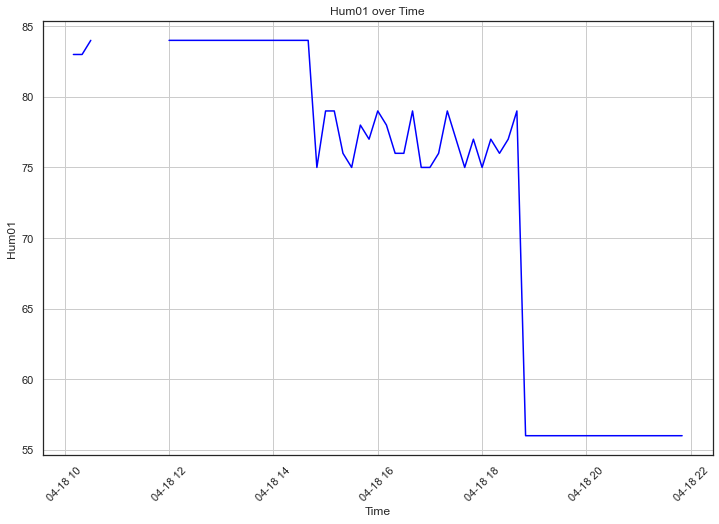

In [68]:
plt.figure(figsize=(12,8))

test = mp01_18[mp01_18['Day'] ==18]
# Plot phosphorous01 against time
plt.plot(test['Timestamp'], test['Hum01'], color='blue', linestyle='-')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Hum01')
plt.title('Hum01 over Time')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show grid
plt.grid(True)

# Show plot
plt.show()

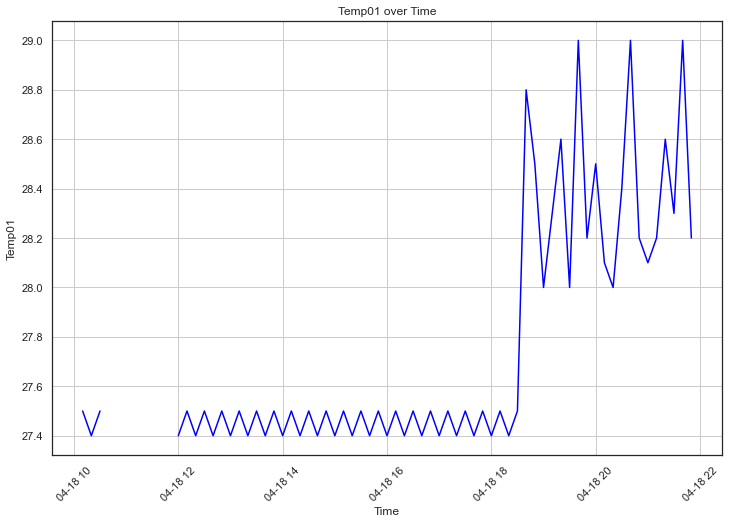

In [69]:
plt.figure(figsize=(12,8))

test = mp01_18[mp01_18['Day'] ==18]
# Plot phosphorous01 against time
plt.plot(test['Timestamp'], test['Temp01'], color='blue', linestyle='-')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Temp01')
plt.title('Temp01 over Time')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show grid
plt.grid(True)

# Show plot
plt.show()

In [70]:
mp01_18.loc[mp01_18["Phosphorous01"] == 1, "Phosphorous01"] = np.nan
mp01_18["Phosphorous01"] = mp01_18["Phosphorous01"].fillna(method='bfill')
# drop rows with no npk values
mp01_18 = mp01_18.dropna(subset=['Nitrogen01']) 

mp01_18.describe()

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2,Day
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0,63.0,63.000000,63.000000,63.0
mean,50.460317,50.777778,57.492063,57.984127,20.698413,29.730159,27.752381,72.809524,1.0,1.0,187.764127,188.075873,18.0
std,25.646370,26.085124,25.391053,23.916853,30.201279,27.919935,0.484887,11.557510,0.0,0.0,2.799021,2.868792,0.0
min,43.000000,43.000000,51.000000,52.000000,14.000000,17.000000,27.400000,56.000000,1.0,1.0,182.980000,183.100000,18.0
25%,43.000000,44.000000,51.000000,52.000000,14.000000,20.000000,27.400000,56.000000,1.0,1.0,185.410000,186.025000,18.0
50%,45.000000,45.000000,51.000000,52.000000,14.000000,25.000000,27.500000,77.000000,1.0,1.0,187.680000,188.640000,18.0
75%,46.000000,46.500000,53.000000,53.000000,14.000000,28.500000,28.100000,84.000000,1.0,1.0,190.430000,190.370000,18.0
max,170.000000,168.000000,170.000000,164.000000,158.000000,152.000000,29.000000,84.000000,1.0,1.0,192.810000,192.830000,18.0


In [71]:
Apr18 = mp01_18.copy()

In [72]:
mp01_18 = mp01_18.describe().loc['mean'].to_frame().T
mp01_18

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2,Day
mean,50.460317,50.777778,57.492063,57.984127,20.698413,29.730159,27.752381,72.809524,1.0,1.0,187.764127,188.075873,18.0


In [73]:
mp01_18['FeedingLog'] = log2[log2['Date'] == "18 April 2024"]['Tank 1'].values[0]
mp01_18

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2,Day,FeedingLog
mean,50.460317,50.777778,57.492063,57.984127,20.698413,29.730159,27.752381,72.809524,1.0,1.0,187.764127,188.075873,18.0,NaN


In [74]:
log2['Date'] = pd.to_datetime(log2['Date'], format='%d %B %Y')

target_date = pd.to_datetime("18 April 2024", format='%d %B %Y')

last_feed_date = target_date
while True:
    last_feed_date -= pd.Timedelta(days=1)
    if last_feed_date < log2['Date'].min():
        last_feed_date = None
        break
    if pd.notnull(log2[log2['Date'] == last_feed_date]['Tank 1']).any():
        break

if last_feed_date is not None:
    days_since_last_feed = (target_date - last_feed_date).days
else:
    days_since_last_feed = None

mp01_18['LastFed'] = days_since_last_feed
mp01_18

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2,Day,FeedingLog,LastFed
mean,50.460317,50.777778,57.492063,57.984127,20.698413,29.730159,27.752381,72.809524,1.0,1.0,187.764127,188.075873,18.0,NaN,1


### 1st May 


In [75]:
mp02_01

,Timestamp,Number of Worms (non-counted),Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Light Intensity,Temp01,Hum01,Heat01,SoilM01,SoilM02,Grams of Compost Harvested,Buzzer (NIL),Unnamed: 16
0,"1 May 2024, 10:00 AM",20,145,145,160,161,102,101,30,28.9,84,57,1,1,NaN,NaN,NaN
1,"1 May 2024, 10:10 AM",20,147,146,160,158,109,109,30,28.6,85,58,1,1,NaN,NaN,NaN
2,"1 May 2024, 10:20 AM",20,147,147,152,157,107,101,30,28.5,85,59,1,1,NaN,NaN,NaN
3,"1 May 2024, 10:30 AM",20,146,146,159,152,108,104,30,28.2,84,57,1,1,NaN,NaN,NaN
4,"1 May 2024, 10:40 AM",20,146,146,159,156,106,101,30,28.4,83,56,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,"1 May 2024, 11:10 PM",20,153,150,161,162,110,109,30,27.4,72,51,1,1,NaN,NaN,NaN
80,"1 May 2024, 11:20 PM",20,150,152,166,164,106,105,30,27.4,72,51,1,1,NaN,NaN,NaN
81,"1 May 2024, 11:30 PM",20,153,153,167,162,111,106,30,27.4,72,51,1,1,NaN,NaN,NaN
82,"1 May 2024, 11:40 PM",20,153,153,164,159,111,106,30,27.4,71,51,1,1,NaN,NaN,NaN


In [76]:
mp02_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      84 non-null     object 
 1   Number of Worms (non-counted)  84 non-null     int64  
 2   Phosphorous01                  84 non-null     int64  
 3   Phosphorous02                  84 non-null     int64  
 4   Nitrogen01                     84 non-null     int64  
 5   Nitrogen02                     84 non-null     int64  
 6   Potassium01                    84 non-null     int64  
 7   Potassium02                    84 non-null     int64  
 8   Light Intensity                84 non-null     int64  
 9   Temp01                         84 non-null     float64
 10  Hum01                          84 non-null     int64  
 11  Heat01                         84 non-null     int64  
 12  SoilM01                        84 non-null     int64

In [77]:
mp02_01 = mp02_01.drop(columns=['Light Intensity', 'Grams of Compost Harvested' , 'Heat01', 'Buzzer (NIL)', 
                                'Number of Worms (non-counted)', 'Timestamp', 'Unnamed: 16'])

process = ['Phosphorous01', 'Phosphorous02', 'Nitrogen01', 'Nitrogen02', 'Potassium01' ,'Potassium02',
           'Temp01', 'Hum01', 'SoilM01', 'SoilM02']
for col in process:
    # Convert non-positive values (such as "?" and negative numbers) with NaN
    mp02_01[col] = pd.to_numeric(mp02_01[col], errors='coerce')

mp02_01.describe()


,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0,84.0
mean,148.261905,148.202381,159.726190,159.440476,107.214286,107.011905,28.202381,77.821429,1.0,1.0
std,2.828934,2.696628,3.668003,3.520512,3.647318,3.341935,0.476174,6.584320,0.0,0.0
min,145.000000,145.000000,152.000000,152.000000,100.000000,101.000000,27.400000,69.000000,1.0,1.0
25%,146.000000,146.000000,157.000000,157.000000,104.000000,105.000000,27.900000,72.000000,1.0,1.0
50%,147.000000,147.000000,160.000000,159.000000,107.000000,107.000000,28.350000,76.000000,1.0,1.0
75%,151.000000,151.000000,162.250000,162.000000,110.000000,109.000000,28.500000,82.250000,1.0,1.0
max,153.000000,153.000000,167.000000,167.000000,114.000000,114.000000,29.000000,94.000000,1.0,1.0


In [78]:
mp02_01 = mp02_01.describe().loc['mean'].to_frame().T
mp02_01

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02
mean,148.261905,148.202381,159.72619,159.440476,107.214286,107.011905,28.202381,77.821429,1.0,1.0


In [79]:
mp02_01['FeedingLog'] = log2[log2['Date'] == "1 May 2024"]['Tank 1'].values[0]
mp02_01

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,FeedingLog
mean,148.261905,148.202381,159.72619,159.440476,107.214286,107.011905,28.202381,77.821429,1.0,1.0,NaN


In [80]:
log2['Date'] = pd.to_datetime(log2['Date'], format='%d %B %Y')

target_date = pd.to_datetime("1 May 2024", format='%d %B %Y')

last_feed_date = target_date
while True:
    last_feed_date -= pd.Timedelta(days=1)
    if last_feed_date < log2['Date'].min():
        last_feed_date = None
        break
    if pd.notnull(log2[log2['Date'] == last_feed_date]['Tank 1']).any():
        break

if last_feed_date is not None:
    days_since_last_feed = (target_date - last_feed_date).days
else:
    days_since_last_feed = None

mp02_01['LastFed'] = days_since_last_feed
mp02_01

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,FeedingLog,LastFed
mean,148.261905,148.202381,159.72619,159.440476,107.214286,107.011905,28.202381,77.821429,1.0,1.0,NaN,3


### 2nd May

In [81]:
mp02_02

,Timestamp,Number of Worms (non-counted),Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Light Intensity,Temp01,Hum01,Heat01,SoilM01,SoilM02,Grams of Compost Harvested,Buzzer (NIL)
0,"2 May 2024, 9:20 AM",20,145,145,161,162,113,119,30,29.1,71,48,1,1,NaN,NaN
1,"2 May 2024, 9:30 AM",20,147,146,169,166,110,115,32,31.3,71,44,1,1,NaN,NaN
2,"2 May 2024, 9:40 AM",20,147,147,165,166,117,113,32,28.7,71,48,1,1,NaN,NaN
3,"2 May 2024, 9:50 AM",20,146,146,166,170,114,115,32,32.8,71,42,1,1,NaN,NaN
4,"2 May 2024, 10:00 AM",20,146,146,167,168,119,112,32,28.5,71,49,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,"2 May 2024, 10:40 PM",20,150,59,48,56,122,118,7,27.1,83,60,1,1,NaN,NaN
81,"2 May 2024, 10:50 PM",20,153,60,48,57,120,120,7,27.2,83,60,1,1,NaN,NaN
82,"2 May 2024, 11:00 PM",20,153,63,48,57,122,121,6,27.0,83,60,1,1,NaN,NaN
83,"2 May 2024, 11:10 PM",20,152,64,46,59,119,120,6,27.3,84,60,1,1,NaN,NaN


In [82]:
mp02_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      85 non-null     object 
 1   Number of Worms (non-counted)  85 non-null     int64  
 2   Phosphorous01                  85 non-null     int64  
 3   Phosphorous02                  85 non-null     int64  
 4   Nitrogen01                     85 non-null     int64  
 5   Nitrogen02                     85 non-null     int64  
 6   Potassium01                    85 non-null     int64  
 7   Potassium02                    85 non-null     int64  
 8   Light Intensity                85 non-null     int64  
 9   Temp01                         85 non-null     float64
 10  Hum01                          85 non-null     int64  
 11  Heat01                         85 non-null     int64  
 12  SoilM01                        85 non-null     int64

In [83]:
mp02_02 = mp02_02.drop(columns=['Light Intensity', 'Grams of Compost Harvested' , 'Heat01', 'Buzzer (NIL)', 
                                'Number of Worms (non-counted)', 'Timestamp'])

process = ['Phosphorous01', 'Phosphorous02', 'Nitrogen01', 'Nitrogen02', 'Potassium01' ,'Potassium02',
           'Temp01', 'Hum01', 'SoilM01', 'SoilM02']

# Convert columns to float
for col in process:
    # Convert non-positive values (such as "?" and negative numbers) with NaN
    mp02_02[col] = pd.to_numeric(mp02_02[col], errors='coerce')
    mp02_02.loc[mp02_02[col] == 0, col] = np.nan

# drop rows with no npk values
mp02_02 = mp02_02.dropna(subset=['Nitrogen01']) 

mp02_02.describe()

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,80.0,82.0
mean,148.426829,81.902439,84.512195,85.243902,118.365854,118.707317,28.834146,76.109756,1.0,1.0
std,2.850300,48.132176,61.719046,61.859570,3.522458,3.936182,1.622772,7.370288,0.0,0.0
min,145.000000,30.000000,23.000000,26.000000,109.000000,106.000000,27.000000,29.000000,1.0,1.0
25%,146.000000,43.250000,35.250000,35.500000,117.250000,118.000000,27.750000,71.000000,1.0,1.0
50%,147.000000,54.000000,46.000000,47.000000,119.000000,119.000000,28.500000,76.000000,1.0,1.0
75%,151.750000,145.750000,165.750000,165.750000,121.000000,121.000000,28.575000,82.000000,1.0,1.0
max,153.000000,147.000000,173.000000,173.000000,123.000000,125.000000,33.000000,86.000000,1.0,1.0


In [84]:
mp02_02 = mp02_02.describe().loc['mean'].to_frame().T
mp02_02

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02
mean,148.426829,81.902439,84.512195,85.243902,118.365854,118.707317,28.834146,76.109756,1.0,1.0


In [85]:
mp02_02['FeedingLog'] = log2[log2['Date'] == "2 May 2024"]['Tank 1'].values[0]
mp02_02

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,FeedingLog
mean,148.426829,81.902439,84.512195,85.243902,118.365854,118.707317,28.834146,76.109756,1.0,1.0,40g of distilled water


In [86]:
log2['Date'] = pd.to_datetime(log2['Date'], format='%d %B %Y')

target_date = pd.to_datetime("2 May 2024", format='%d %B %Y')

last_feed_date = target_date
while True:
    last_feed_date -= pd.Timedelta(days=1)
    if last_feed_date < log2['Date'].min():
        last_feed_date = None
        break
    if pd.notnull(log2[log2['Date'] == last_feed_date]['Tank 1']).any():
        break

if last_feed_date is not None:
    days_since_last_feed = (target_date - last_feed_date).days
else:
    days_since_last_feed = None

mp02_02['LastFed'] = days_since_last_feed
mp02_02

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,FeedingLog,LastFed
mean,148.426829,81.902439,84.512195,85.243902,118.365854,118.707317,28.834146,76.109756,1.0,1.0,40g of distilled water,4


### 3rd May 

In [87]:
mp02_03

,Timestamp,Number of Worms (non-counted),Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Light Intensity,Temp01,Hum01,Heat01,SoilM01,SoilM02,Grams of Compost Harvested,Buzzer (NIL),Unnamed: 16
0,"3 May 2024, 8:40 AM",20,39,32,161,29,107,114,32,31.0,73,46,1,1,NaN,NaN,NaN
1,"3 May 2024, 8:50 AM",20,39,32,31,30,119,124,30,31.2,73,46,1,1,NaN,NaN,NaN
2,"3 May 2024, 9:00 AM",20,36,35,165,33,106,125,31,30.3,72,46,1,1,NaN,NaN,NaN
3,"3 May 2024, 9:10 AM",20,37,33,35,35,123,123,31,30.2,74,48,1,1,NaN,NaN,NaN
4,"3 May 2024, 9:20 AM",20,38,36,34,30,122,118,33,31.0,73,46,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,"3 May 2024, 8:50 PM",20,40,37,173,34,120,120,4,27.4,67,49,1,1,NaN,NaN,NaN
74,"3 May 2024, 9:00 PM",20,38,37,176,34,112,118,3,27.5,68,50,1,1,NaN,NaN,NaN
75,"3 May 2024, 9:10 PM",20,39,37,167,34,107,143,2,27.4,66,48,1,1,NaN,NaN,NaN
76,"3 May 2024, 9:20 PM",20,39,36,166,35,111,121,2,27.4,66,49,1,1,NaN,NaN,NaN


In [88]:
mp02_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      78 non-null     object 
 1   Number of Worms (non-counted)  78 non-null     int64  
 2   Phosphorous01                  78 non-null     int64  
 3   Phosphorous02                  78 non-null     int64  
 4   Nitrogen01                     78 non-null     int64  
 5   Nitrogen02                     78 non-null     int64  
 6   Potassium01                    78 non-null     int64  
 7   Potassium02                    78 non-null     int64  
 8   Light Intensity                78 non-null     int64  
 9   Temp01                         78 non-null     float64
 10  Hum01                          78 non-null     int64  
 11  Heat01                         78 non-null     int64  
 12  SoilM01                        78 non-null     int64

In [89]:
mp02_03 = mp02_03.drop(columns=['Light Intensity', 'Grams of Compost Harvested' , 'Heat01', 'Buzzer (NIL)', 
                                'Number of Worms (non-counted)', 'Timestamp', 'Unnamed: 16'])

process = ['Phosphorous01', 'Phosphorous02', 'Nitrogen01', 'Nitrogen02', 'Potassium01' ,'Potassium02',
           'Temp01', 'Hum01', 'SoilM01', 'SoilM02']

# Convert columns to float
for col in process:
    # Convert non-positive values (such as "?" and negative numbers) with NaN
    mp02_03[col] = pd.to_numeric(mp02_03[col], errors='coerce')
    mp02_03.loc[mp02_03[col] == 0, col] = np.nan

# drop rows with no npk values
mp02_03 = mp02_03.dropna(subset=['Nitrogen01']) 

mp02_03.describe()

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0,78.0
mean,35.564103,35.846154,132.153846,33.128205,117.820513,123.141026,29.680769,73.051282,1.0,1.0
std,2.934744,2.711577,60.926414,2.008805,6.301399,8.553460,1.476136,3.657042,0.0,0.0
min,30.000000,30.000000,30.000000,29.000000,104.000000,104.000000,27.000000,66.000000,1.0,1.0
25%,33.000000,33.250000,36.000000,32.000000,116.250000,119.000000,28.600000,72.000000,1.0,1.0
50%,36.000000,37.000000,166.000000,33.000000,119.000000,121.000000,30.100000,73.000000,1.0,1.0
75%,38.000000,38.000000,171.750000,35.000000,122.000000,123.000000,31.175000,75.000000,1.0,1.0
max,40.000000,40.000000,176.000000,36.000000,143.000000,150.000000,31.500000,82.000000,1.0,1.0


In [90]:
mp02_03 = mp02_03.describe().loc['mean'].to_frame().T
mp02_03

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02
mean,35.564103,35.846154,132.153846,33.128205,117.820513,123.141026,29.680769,73.051282,1.0,1.0


In [91]:
mp02_03['FeedingLog'] = log2[log2['Date'] == "3 May 2024"]['Tank 1'].values[0]
mp02_03

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,FeedingLog
mean,35.564103,35.846154,132.153846,33.128205,117.820513,123.141026,29.680769,73.051282,1.0,1.0,NaN


In [92]:
log2['Date'] = pd.to_datetime(log2['Date'], format='%d %B %Y')

target_date = pd.to_datetime("3 May 2024", format='%d %B %Y')

last_feed_date = target_date
while True:
    last_feed_date -= pd.Timedelta(days=1)
    if last_feed_date < log2['Date'].min():
        last_feed_date = None
        break
    if pd.notnull(log2[log2['Date'] == last_feed_date]['Tank 1']).any():
        break

if last_feed_date is not None:
    days_since_last_feed = (target_date - last_feed_date).days
else:
    days_since_last_feed = None

mp02_03['LastFed'] = days_since_last_feed
mp02_03

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,FeedingLog,LastFed
mean,35.564103,35.846154,132.153846,33.128205,117.820513,123.141026,29.680769,73.051282,1.0,1.0,NaN,1


### 4th May

In [93]:
mp02_04

,Timestamp,Number of Worms (non-counted),Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Light Intensity,Temp01,Hum01,Heat01,SoilM01,SoilM02,Grams of Compost Harvested,Buzzer (NIL)
0,"4 May 2024, 8:40 AM",20,39,32,161,29,141,137,32,31.0,73,46,1,1,NaN,NaN
1,"4 May 2024, 8:50 AM",20,39,32,31,32,145,140,30,31.2,73,46,1,1,NaN,NaN
2,"4 May 2024, 9:00 AM",20,36,35,165,36,138,142,31,30.3,72,46,1,1,NaN,NaN
3,"4 May 2024, 9:10 AM",20,37,33,32,36,145,144,31,30.2,74,48,1,1,NaN,NaN
4,"4 May 2024, 9:20 AM",20,38,36,33,36,136,141,33,31.0,73,46,1,1,NaN,NaN
5,"4 May 2024, 9:30 AM",20,36,32,35,30,138,144,31,31.3,74,46,1,1,NaN,NaN
6,"4 May 2024, 9:40 AM",20,39,32,36,36,139,144,32,31.2,74,46,1,1,NaN,NaN
7,"4 May 2024, 9:50 AM",20,36,35,34,35,143,146,34,31.5,73,45,1,1,NaN,NaN
8,"4 May 2024, 10:00 AM",20,35,31,33,33,139,143,33,31.5,74,46,1,1,NaN,NaN
9,"4 May 2024, 10:10 AM",20,33,33,35,31,145,145,32,31.5,73,45,1,1,NaN,NaN


In [94]:
mp02_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      41 non-null     object 
 1   Number of Worms (non-counted)  41 non-null     int64  
 2   Phosphorous01                  41 non-null     int64  
 3   Phosphorous02                  41 non-null     int64  
 4   Nitrogen01                     41 non-null     int64  
 5   Nitrogen02                     41 non-null     int64  
 6   Potassium01                    41 non-null     int64  
 7   Potassium02                    41 non-null     int64  
 8   Light Intensity                41 non-null     int64  
 9   Temp01                         41 non-null     float64
 10  Hum01                          41 non-null     int64  
 11  Heat01                         41 non-null     int64  
 12  SoilM01                        41 non-null     int64

In [95]:
mp02_04 = mp02_04.drop(columns=['Light Intensity', 'Grams of Compost Harvested' , 'Heat01', 'Buzzer (NIL)', 
                                'Number of Worms (non-counted)', 'Timestamp'])

process = ['Phosphorous01', 'Phosphorous02', 'Nitrogen01', 'Nitrogen02', 'Potassium01' ,'Potassium02',
           'Temp01', 'Hum01', 'SoilM01', 'SoilM02']

# Convert columns to float
for col in process:
    # Convert non-positive values (such as "?" and negative numbers) with NaN
    mp02_04[col] = pd.to_numeric(mp02_04[col], errors='coerce')

# drop rows with no npk values
mp02_04 = mp02_04.dropna(subset=['Nitrogen01']) 

mp02_04.describe()

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.0
mean,34.390244,34.317073,98.390244,33.024390,141.365854,142.512195,31.056098,73.926829,1.0,1.0
std,2.256968,2.832305,67.856053,2.263712,3.191834,2.992674,0.425470,1.941523,0.0,0.0
min,31.000000,30.000000,30.000000,29.000000,136.000000,137.000000,30.000000,72.000000,1.0,1.0
25%,33.000000,32.000000,33.000000,31.000000,139.000000,140.000000,30.900000,73.000000,1.0,1.0
50%,34.000000,34.000000,36.000000,33.000000,141.000000,143.000000,31.200000,74.000000,1.0,1.0
75%,36.000000,36.000000,166.000000,35.000000,144.000000,145.000000,31.300000,74.000000,1.0,1.0
max,39.000000,39.000000,173.000000,36.000000,146.000000,147.000000,31.500000,82.000000,1.0,1.0


In [96]:
mp02_04 = mp02_04.describe().loc['mean'].to_frame().T
mp02_04

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02
mean,34.390244,34.317073,98.390244,33.02439,141.365854,142.512195,31.056098,73.926829,1.0,1.0


In [97]:
mp02_04['FeedingLog'] = log2[log2['Date'] == "4 May 2024"]['Tank 1'].values[0]
mp02_04

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,FeedingLog
mean,34.390244,34.317073,98.390244,33.02439,141.365854,142.512195,31.056098,73.926829,1.0,1.0,NaN


In [98]:
log2['Date'] = pd.to_datetime(log2['Date'], format='%d %B %Y')

target_date = pd.to_datetime("4 May 2024", format='%d %B %Y')

last_feed_date = target_date
while True:
    last_feed_date -= pd.Timedelta(days=1)
    if last_feed_date < log2['Date'].min():
        last_feed_date = None
        break
    if pd.notnull(log2[log2['Date'] == last_feed_date]['Tank 1']).any():
        break

if last_feed_date is not None:
    days_since_last_feed = (target_date - last_feed_date).days
else:
    days_since_last_feed = None

mp02_04['LastFed'] = days_since_last_feed
mp02_04

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,FeedingLog,LastFed
mean,34.390244,34.317073,98.390244,33.02439,141.365854,142.512195,31.056098,73.926829,1.0,1.0,NaN,2


### Combining for Normal Tank data 10th April to 18th April

In [99]:
data = pd.concat([Apr10, Apr14, Apr15, Apr16, Apr17, Apr18], axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 926 entries, 0 to 70
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Timestamp      926 non-null    object 
 1   Phosphorous01  926 non-null    float64
 2   Phosphorous02  926 non-null    float64
 3   Nitrogen01     926 non-null    float64
 4   Nitrogen02     926 non-null    float64
 5   Potassium01    926 non-null    float64
 6   Potassium02    926 non-null    float64
 7   Temp01         926 non-null    float64
 8   Hum01          926 non-null    float64
 9   SoilM01        926 non-null    float64
 10  SoilM02        926 non-null    float64
 11  pH Rod 1       926 non-null    float64
 12  pH Rod 2       926 non-null    float64
 13  Time           63 non-null     object 
 14  Day            63 non-null     float64
dtypes: float64(13), object(2)
memory usage: 115.8+ KB


In [100]:
data.describe()

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,pH Rod 1,pH Rod 2,Day
count,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,63.0
mean,139.181425,140.423326,149.951404,146.676026,142.940605,144.204104,30.868359,89.618790,0.949244,0.943844,188.027727,188.590794,18.0
std,42.696582,42.759529,39.662561,44.487652,46.835788,45.093386,2.654111,17.418488,0.219618,0.230346,6.931702,6.881113,0.0
min,43.000000,43.000000,51.000000,51.000000,14.000000,17.000000,27.400000,0.000000,0.000000,0.000000,115.580000,116.580000,18.0
25%,136.000000,136.000000,142.000000,150.000000,140.250000,140.000000,28.100000,93.000000,1.000000,1.000000,185.552500,185.890000,18.0
50%,147.000000,147.000000,166.000000,159.000000,153.000000,152.000000,31.700000,95.000000,1.000000,1.000000,188.065000,188.395000,18.0
75%,167.000000,170.000000,177.000000,172.000000,173.000000,174.000000,33.175000,97.000000,1.000000,1.000000,190.605000,190.920000,18.0
max,199.000000,199.000000,201.000000,201.000000,201.000000,201.000000,36.100000,100.000000,1.000000,1.000000,209.670000,211.100000,18.0


In [101]:
data.to_csv("newData/combinedNew.csv", index=False)

### Combining For Feeding Log

In [102]:
df = pd.concat([mp01_23, mp01_30, mp01_05, mp01_06, mp01_10, mp01_14, mp01_15, mp01_16, mp01_17, mp01_18, 
                mp02_01, mp02_02, mp02_03, mp02_04], axis=0)
df = df.drop(columns=['Day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, mean to mean
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Phosphorous01  14 non-null     float64
 1   Phosphorous02  14 non-null     float64
 2   Nitrogen01     14 non-null     float64
 3   Nitrogen02     14 non-null     float64
 4   Potassium01    14 non-null     float64
 5   Potassium02    14 non-null     float64
 6   Temp01         14 non-null     float64
 7   Hum01          14 non-null     float64
 8   SoilM01        14 non-null     float64
 9   SoilM02        14 non-null     float64
 10  FeedingLog     3 non-null      object 
 11  LastFed        14 non-null     int64  
 12  pH Rod 1       6 non-null      float64
 13  pH Rod 2       6 non-null      float64
dtypes: float64(12), int64(1), object(1)
memory usage: 1.6+ KB


In [103]:
df['FeedingLog'] = df['FeedingLog'].fillna("None")
df = df.drop(columns=['pH Rod 1', 'pH Rod 2'])
df.loc[df['FeedingLog'] != 'None', 'LastFed'] = 0
df.reset_index(drop=True, inplace=True)
df

,Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Temp01,Hum01,SoilM01,SoilM02,FeedingLog,LastFed
0,160.000000,150.000000,120.000000,150.000000,100.000000,94.000000,28.500000,94.127436,1.000000,1.000000,None,2
1,165.209895,158.154423,120.209895,143.650675,100.152924,94.000000,28.500000,94.116139,1.000000,1.000000,None,1
2,168.433283,170.254873,170.008996,169.286357,170.155922,171.107946,31.506597,95.683658,1.000000,1.000000,None,1
3,157.833927,156.839252,156.462113,157.590919,156.375027,158.168880,31.452324,96.131934,1.000000,1.000000,None,2
4,157.230769,159.393899,170.185676,170.122016,169.705570,170.366048,30.766048,95.901857,1.000000,1.000000,"15g coffee grounds, 100g of distilled water, 3...",0
5,157.404255,157.895137,161.176292,162.762918,156.957447,156.012158,32.284195,87.537994,0.869301,0.854103,None,1
6,56.285714,58.183673,89.265306,61.979592,78.489796,77.653061,30.804082,78.897959,1.000000,1.000000,None,2
7,57.611111,62.481481,82.740741,53.388889,72.000000,75.425926,29.887037,79.388889,0.925926,0.925926,None,3
8,162.444444,158.685185,170.444444,158.592593,142.722222,152.333333,27.631481,98.000000,1.000000,1.000000,"15g coffee grounds, 100g of distilled water, 3...",0
9,50.460317,50.777778,57.492063,57.984127,20.698413,29.730159,27.752381,72.809524,1.000000,1.000000,None,1


In [104]:
df['Mean_Phosphorous'] = df[['Phosphorous01', 'Phosphorous02']].mean(axis=1)
df['Mean_Nitrogen'] = df[['Nitrogen01', 'Nitrogen02']].mean(axis=1)
df['Mean_Potassium'] = df[['Potassium01', 'Potassium02']].mean(axis=1)

df = df.drop(columns = NPK)
df = df.drop(columns = ['SoilM01', 'SoilM02'])
df

,Temp01,Hum01,FeedingLog,LastFed,Mean_Phosphorous,Mean_Nitrogen,Mean_Potassium
0,28.500000,94.127436,None,2,155.000000,135.000000,97.000000
1,28.500000,94.116139,None,1,161.682159,131.930285,97.076462
2,31.506597,95.683658,None,1,169.344078,169.647676,170.631934
3,31.452324,96.131934,None,2,157.336590,157.026516,157.271953
4,30.766048,95.901857,"15g coffee grounds, 100g of distilled water, 3...",0,158.312334,170.153846,170.035809
5,32.284195,87.537994,None,1,157.649696,161.969605,156.484802
6,30.804082,78.897959,None,2,57.234694,75.622449,78.071429
7,29.887037,79.388889,None,3,60.046296,68.064815,73.712963
8,27.631481,98.000000,"15g coffee grounds, 100g of distilled water, 3...",0,160.564815,164.518519,147.527778
9,27.752381,72.809524,None,1,50.619048,57.738095,25.214286


In [105]:
df.iloc[4, 2] = "15g coffee grounds, 100g of distilled water"
df.iloc[8, 2] = "15g coffee grounds, 100g of distilled water"
df

,Temp01,Hum01,FeedingLog,LastFed,Mean_Phosphorous,Mean_Nitrogen,Mean_Potassium
0,28.500000,94.127436,None,2,155.000000,135.000000,97.000000
1,28.500000,94.116139,None,1,161.682159,131.930285,97.076462
2,31.506597,95.683658,None,1,169.344078,169.647676,170.631934
3,31.452324,96.131934,None,2,157.336590,157.026516,157.271953
4,30.766048,95.901857,"15g coffee grounds, 100g of distilled water",0,158.312334,170.153846,170.035809
5,32.284195,87.537994,None,1,157.649696,161.969605,156.484802
6,30.804082,78.897959,None,2,57.234694,75.622449,78.071429
7,29.887037,79.388889,None,3,60.046296,68.064815,73.712963
8,27.631481,98.000000,"15g coffee grounds, 100g of distilled water",0,160.564815,164.518519,147.527778
9,27.752381,72.809524,None,1,50.619048,57.738095,25.214286


In [106]:
def calculate_food_amounts(food_text, food_df):
    # Initialize amounts
    brown_amt = 0
    green_amt = 0
    water_amt = 0

    # Check if the food_text is "None"
    if food_text == "None":
        return brown_amt, green_amt, water_amt

    # Split the food text by comma
    food_items = food_text.split(',')

    # Loop through unique food items
    for item in set(food_items):
        item = item.strip()
        # Extract the amount and food name using regex
        match = re.match(r'(\d+)\s*[a-zA-Z]*\s*(.*)', item)
        if match:
            amount = int(match.group(1))
            food_name = match.group(2).strip().lower()
            
            # Check for water
            if 'water' in food_name:
                water_amt += amount
            else:
                # Find the category in the food_df
                food_row = food_df[food_df['Food Name'].str.lower().str.contains(food_name)]
                if not food_row.empty:
                    category = food_row.iloc[0]['Category']
                    if category == 'Brown':
                        brown_amt += amount
                    elif category == 'Green':
                        green_amt += amount

    return brown_amt, green_amt, water_amt

# Function to process the feeding log for each row
def process_feeding_log(row, food_df):
    feeding_log = row['FeedingLog']
    brown_amt, green_amt, water_amt = calculate_food_amounts(feeding_log, food_df)
    return pd.Series([brown_amt, green_amt, water_amt])

df[['BrownAmt', 'GreenAmt', 'WaterAmt']] = df.apply(process_feeding_log, food_df=emission, axis=1)
df.drop(columns=['FeedingLog'], inplace = True)
df

,Temp01,Hum01,LastFed,Mean_Phosphorous,Mean_Nitrogen,Mean_Potassium,BrownAmt,GreenAmt,WaterAmt
0,28.500000,94.127436,2,155.000000,135.000000,97.000000,0,0,0
1,28.500000,94.116139,1,161.682159,131.930285,97.076462,0,0,0
2,31.506597,95.683658,1,169.344078,169.647676,170.631934,0,0,0
3,31.452324,96.131934,2,157.336590,157.026516,157.271953,0,0,0
4,30.766048,95.901857,0,158.312334,170.153846,170.035809,15,0,100
5,32.284195,87.537994,1,157.649696,161.969605,156.484802,0,0,0
6,30.804082,78.897959,2,57.234694,75.622449,78.071429,0,0,0
7,29.887037,79.388889,3,60.046296,68.064815,73.712963,0,0,0
8,27.631481,98.000000,0,160.564815,164.518519,147.527778,15,0,100
9,27.752381,72.809524,1,50.619048,57.738095,25.214286,0,0,0


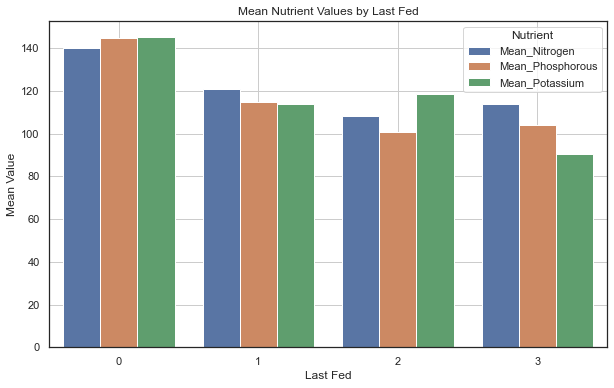

In [107]:
mean_nitrogen_by_last_fed = df.groupby('LastFed')['Mean_Nitrogen'].mean().reset_index()
mean_phosphorus_by_last_fed = df.groupby('LastFed')['Mean_Phosphorous'].mean().reset_index()
mean_potassium_by_last_fed = df.groupby('LastFed')['Mean_Potassium'].mean().reset_index()

# Combine the mean values into a single DataFrame
mean_values = pd.concat([mean_nitrogen_by_last_fed, mean_phosphorus_by_last_fed['Mean_Phosphorous'], mean_potassium_by_last_fed['Mean_Potassium']], axis=1)

# Melt the DataFrame to make it suitable for plotting
mean_values_melted = mean_values.melt(id_vars='LastFed', var_name='Nutrient', value_name='Mean Value')

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_values_melted, x='LastFed', y='Mean Value', hue='Nutrient')
plt.xlabel('Last Fed')
plt.ylabel('Mean Value')
plt.title('Mean Nutrient Values by Last Fed')
plt.legend(title='Nutrient')
plt.grid(True)
plt.show()


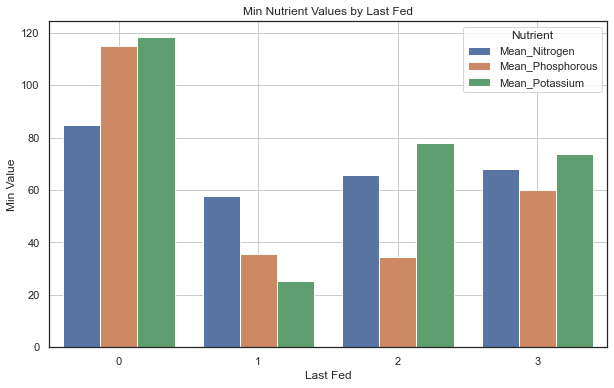

In [108]:
mean_nitrogen_by_last_fed = df.groupby('LastFed')['Mean_Nitrogen'].min().reset_index()
mean_phosphorus_by_last_fed = df.groupby('LastFed')['Mean_Phosphorous'].min().reset_index()
mean_potassium_by_last_fed = df.groupby('LastFed')['Mean_Potassium'].min().reset_index()

# Combine the mean values into a single DataFrame
mean_values = pd.concat([mean_nitrogen_by_last_fed, mean_phosphorus_by_last_fed['Mean_Phosphorous'], mean_potassium_by_last_fed['Mean_Potassium']], axis=1)

# Melt the DataFrame to make it suitable for plotting
mean_values_melted = mean_values.melt(id_vars='LastFed', var_name='Nutrient', value_name='Mean Value')

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_values_melted, x='LastFed', y='Mean Value', hue='Nutrient')
plt.xlabel('Last Fed')
plt.ylabel('Min Value')
plt.title('Min Nutrient Values by Last Fed')
plt.legend(title='Nutrient')
plt.grid(True)
plt.show()


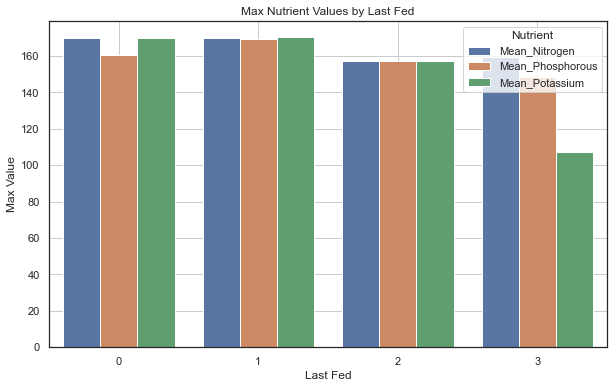

In [109]:
mean_nitrogen_by_last_fed = df.groupby('LastFed')['Mean_Nitrogen'].max().reset_index()
mean_phosphorus_by_last_fed = df.groupby('LastFed')['Mean_Phosphorous'].max().reset_index()
mean_potassium_by_last_fed = df.groupby('LastFed')['Mean_Potassium'].max().reset_index()

# Combine the mean values into a single DataFrame
mean_values = pd.concat([mean_nitrogen_by_last_fed, mean_phosphorus_by_last_fed['Mean_Phosphorous'], mean_potassium_by_last_fed['Mean_Potassium']], axis=1)

# Melt the DataFrame to make it suitable for plotting
mean_values_melted = mean_values.melt(id_vars='LastFed', var_name='Nutrient', value_name='Mean Value')

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_values_melted, x='LastFed', y='Mean Value', hue='Nutrient')
plt.xlabel('Last Fed')
plt.ylabel('Max Value')
plt.title('Max Nutrient Values by Last Fed')
plt.legend(title='Nutrient')
plt.grid(True)
plt.show()


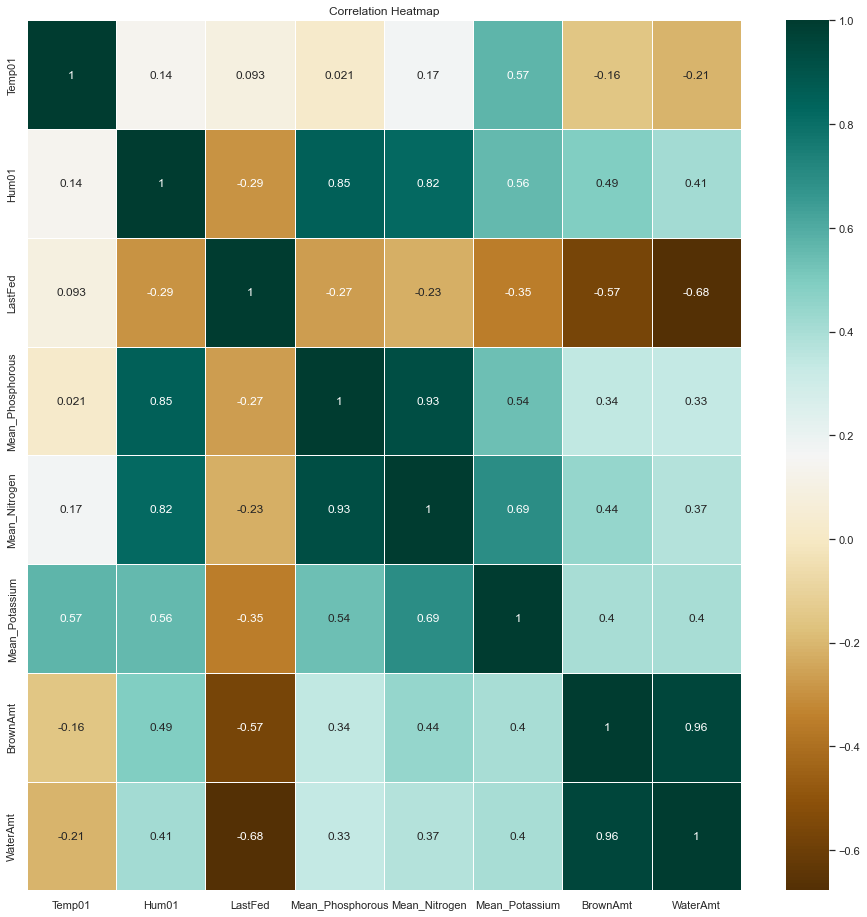

In [110]:
correlation_matrix = df.drop(columns=['GreenAmt']).corr()
colormap = plt.cm.BrBG
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap=colormap, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

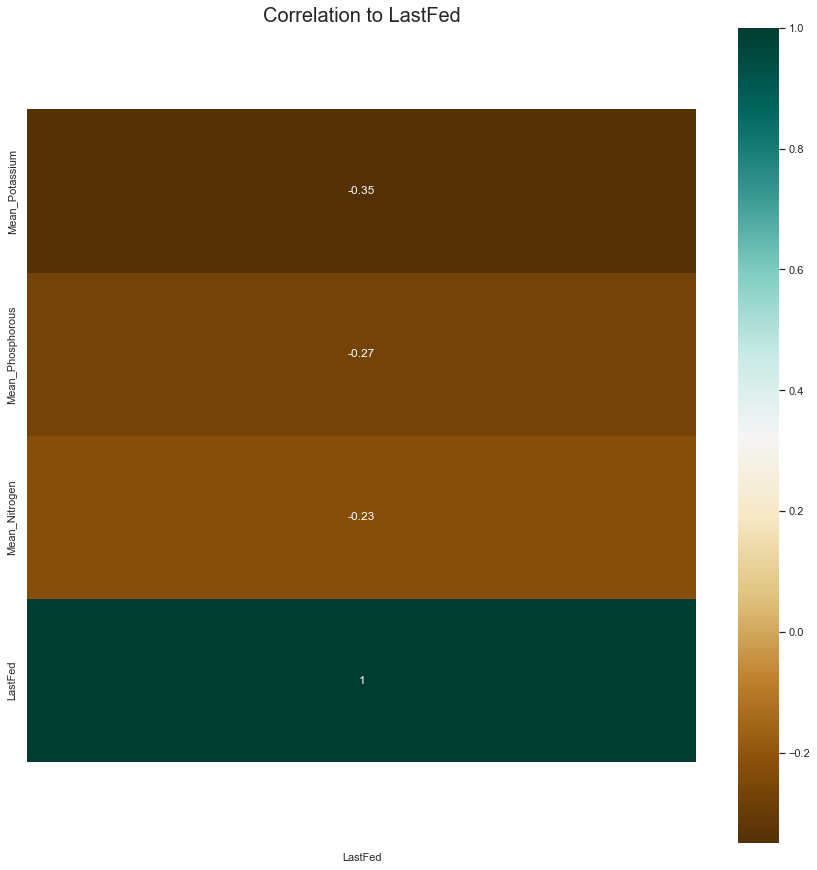

In [111]:
sample = df[['Mean_Nitrogen', 'Mean_Potassium', 'Mean_Phosphorous', 'LastFed']].copy()
target_corr = sample.corr()["LastFed"].sort_values()
corr_df = pd.DataFrame({"LastFed": target_corr})
plt.figure(figsize=(15,15))
plt.title('Correlation to LastFed', size=20)
ax = sns.heatmap(corr_df, cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()